In [18]:
path = "/Users/timea/Documents/Projekti/craAIRsis/Covid BG/data/Andreja/COVID.csv"
feature_mapping_path = "/Users/timea/Documents/Projekti/craAIRsis/Covid BG/data/Andreja/feature_mapping.csv"

In [19]:
import pandas as pd

In [20]:
data = pd.read_csv(path)

In [21]:
lag_features = pd.read_csv(feature_mapping_path)
lag_features = lag_features[
    lag_features["Category"].isin(
        ["Mobility", "Governmental measures", "Meteo", "Active cases"]
    )
]["Feature"].tolist()

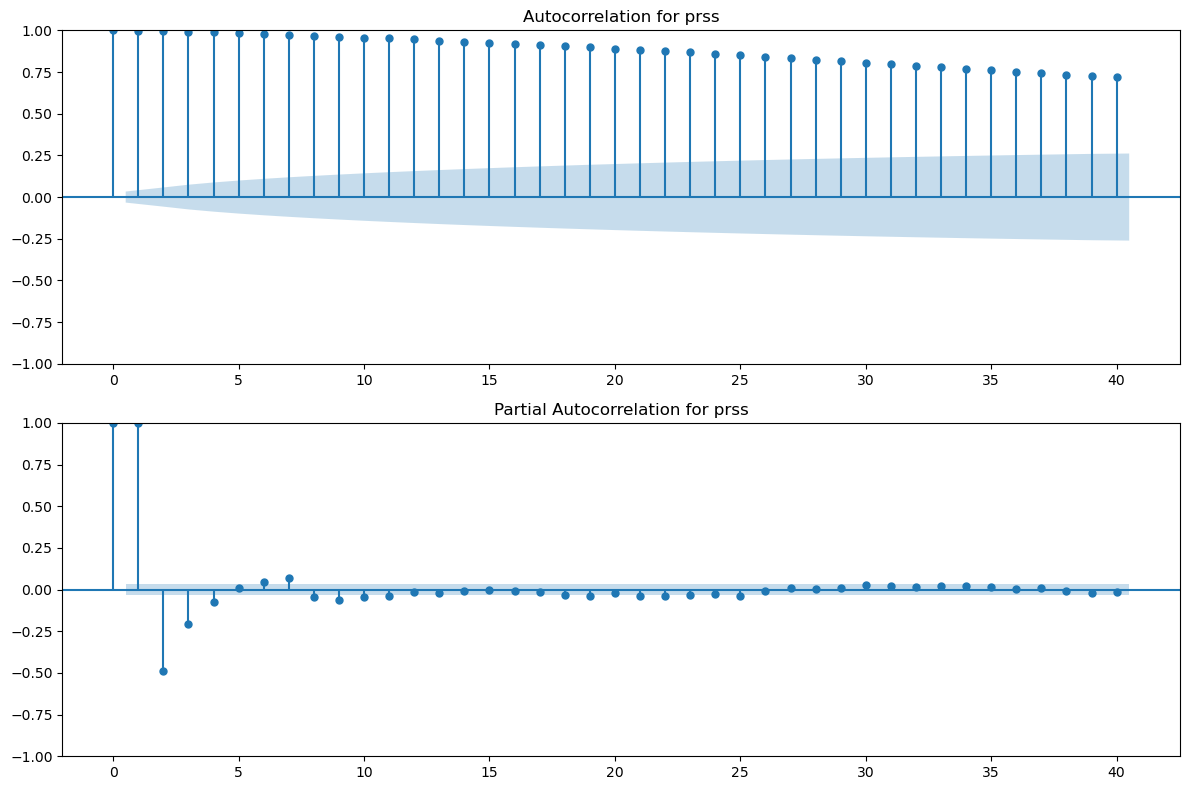

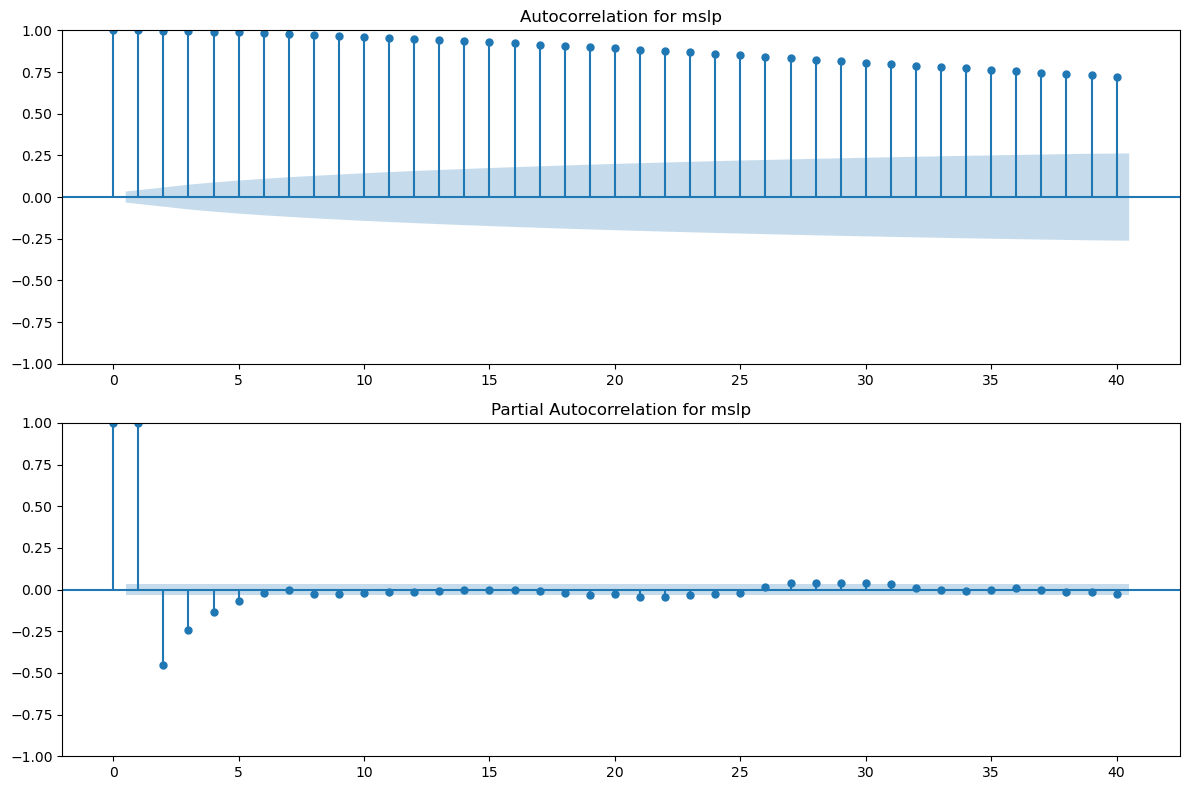

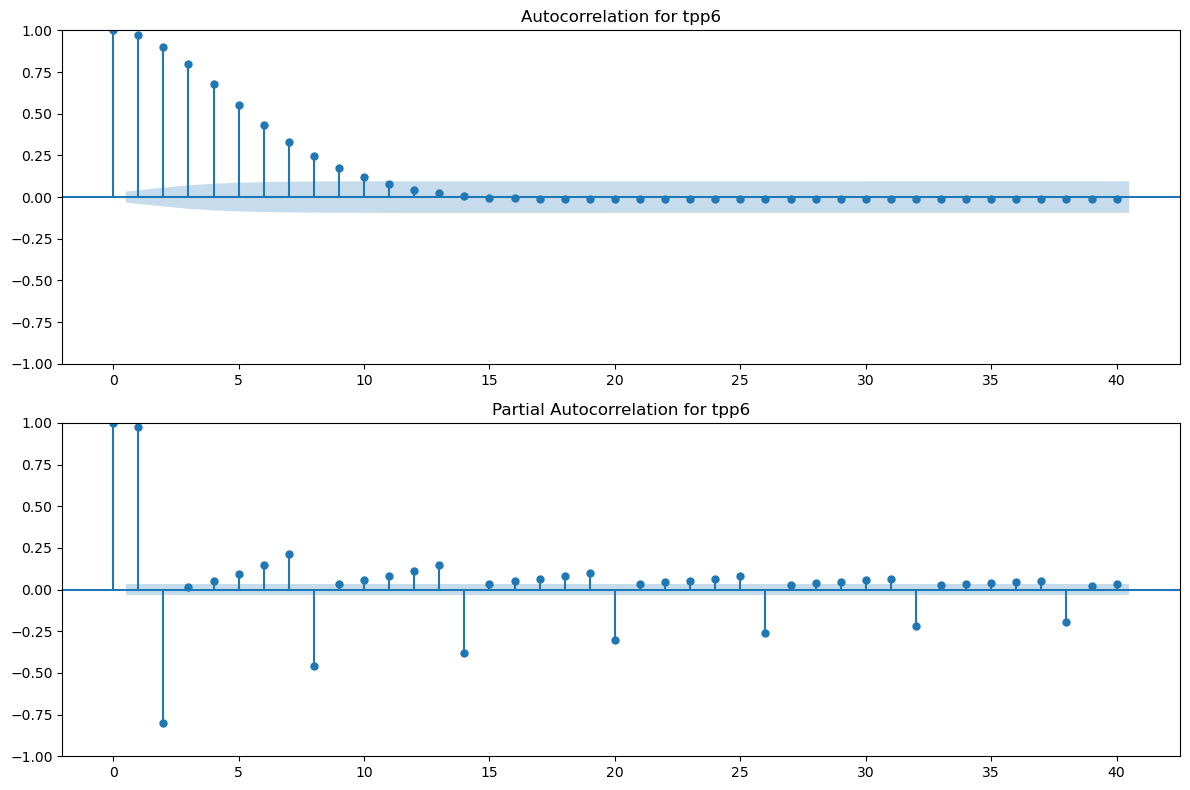

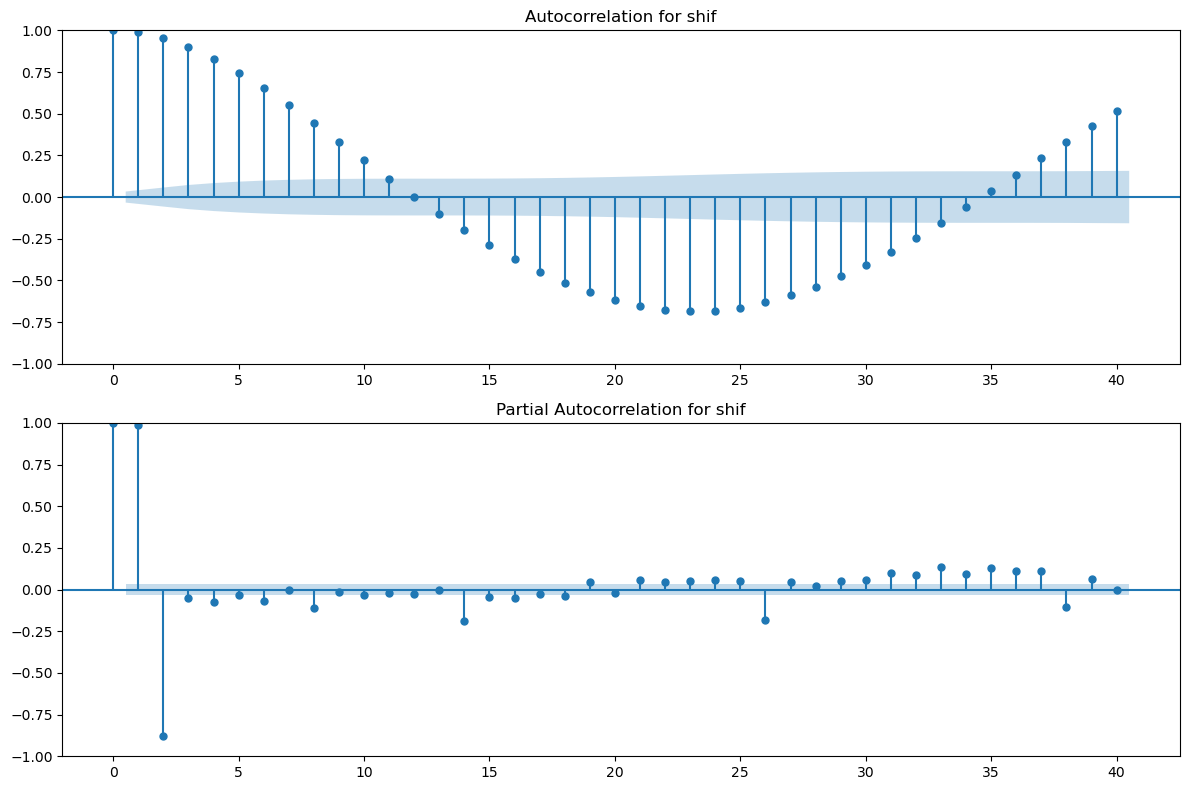

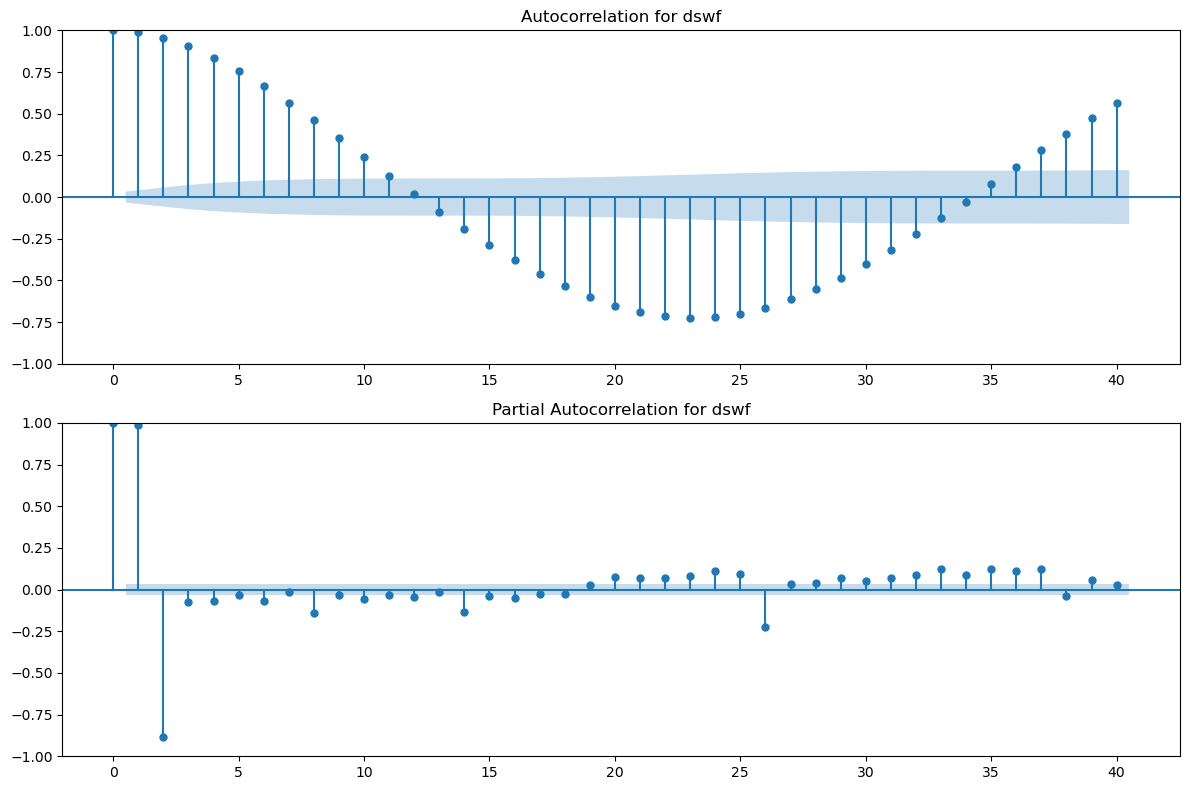

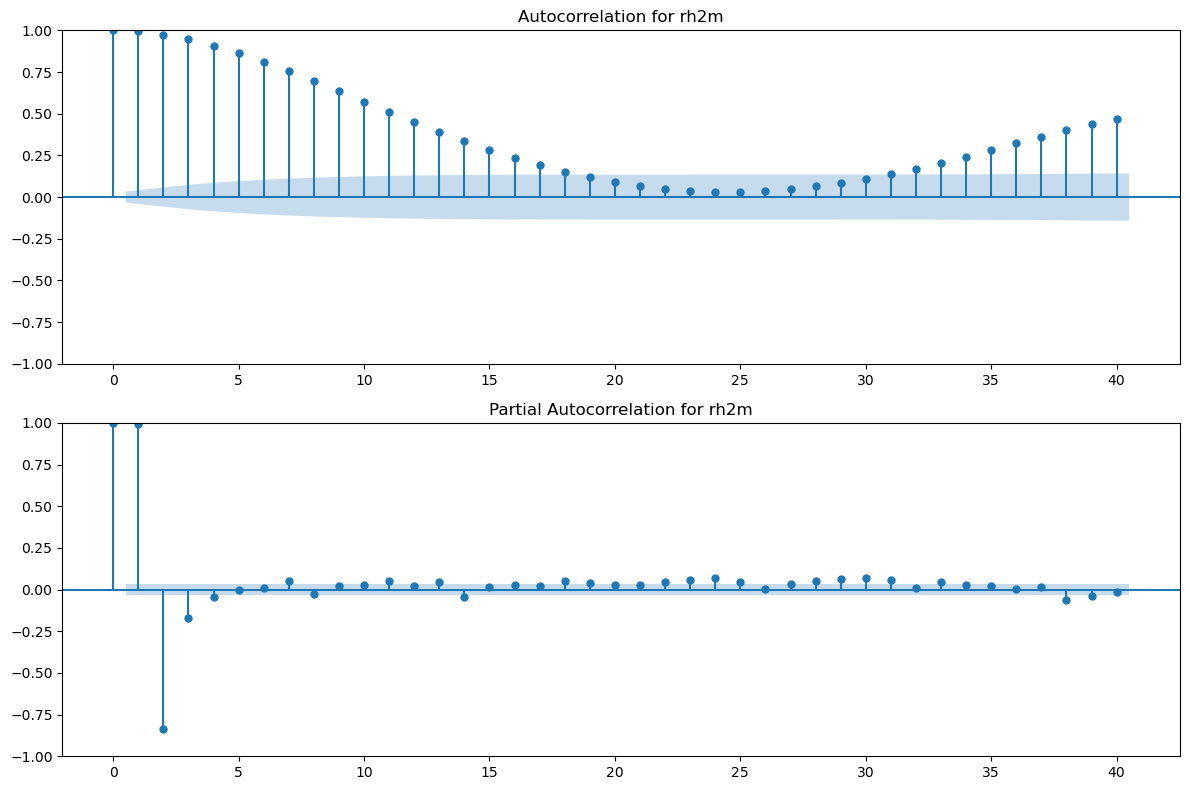

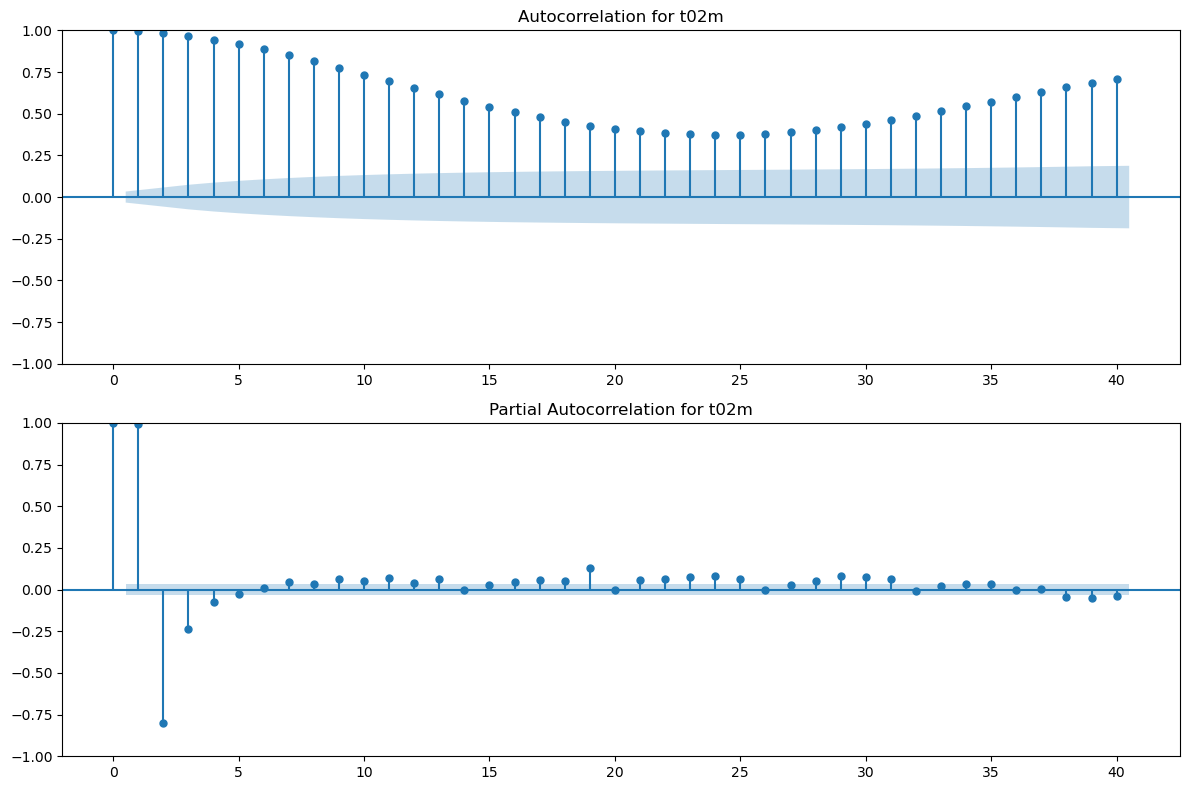

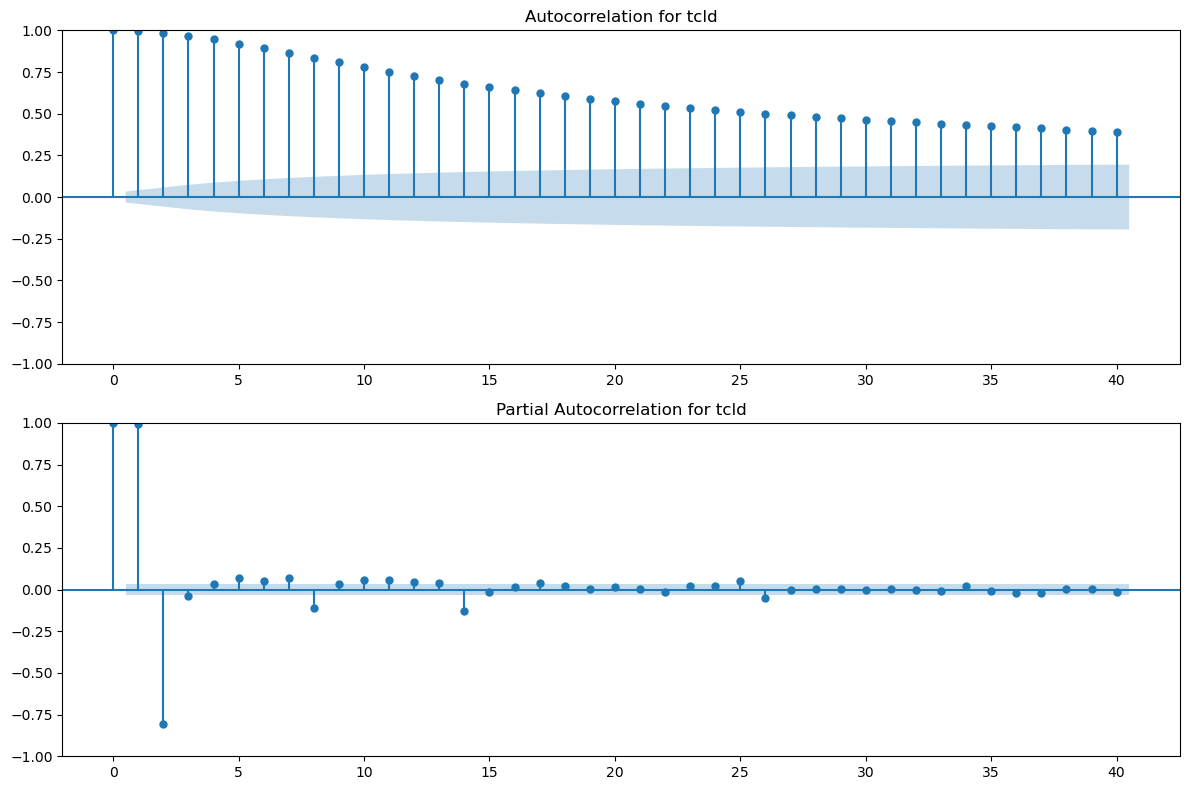

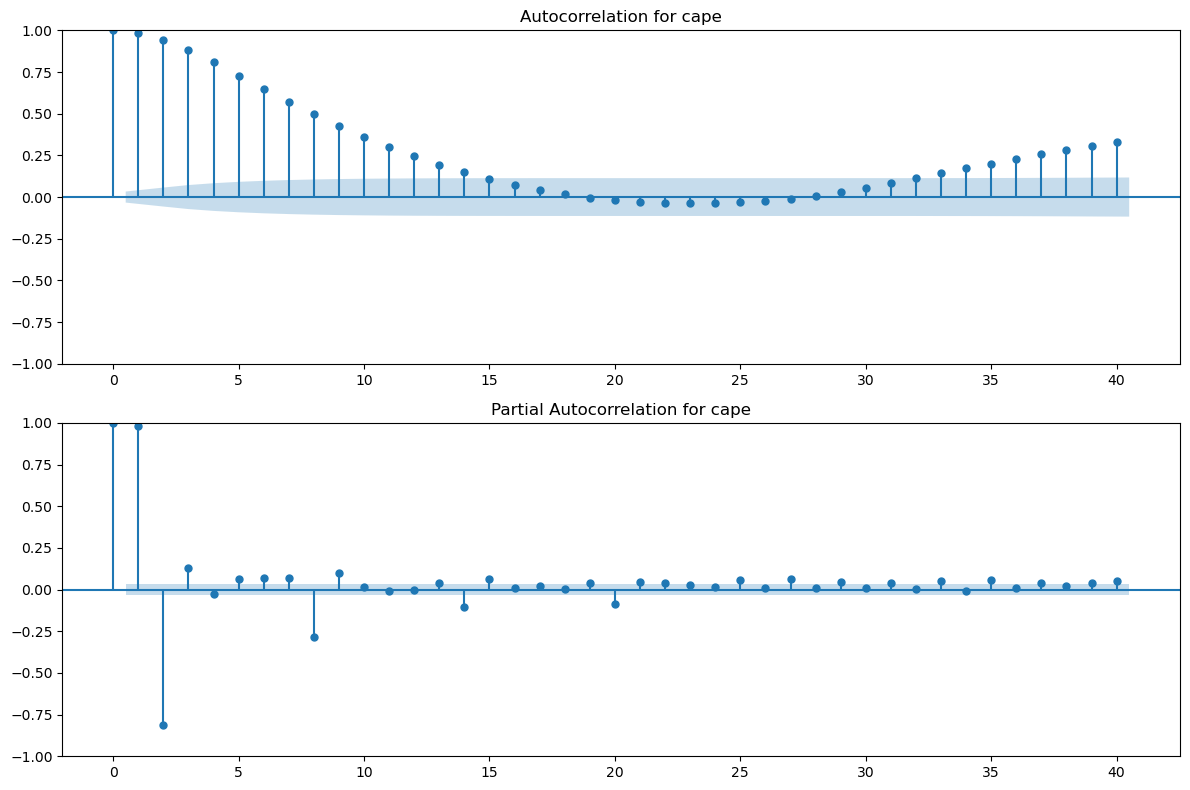

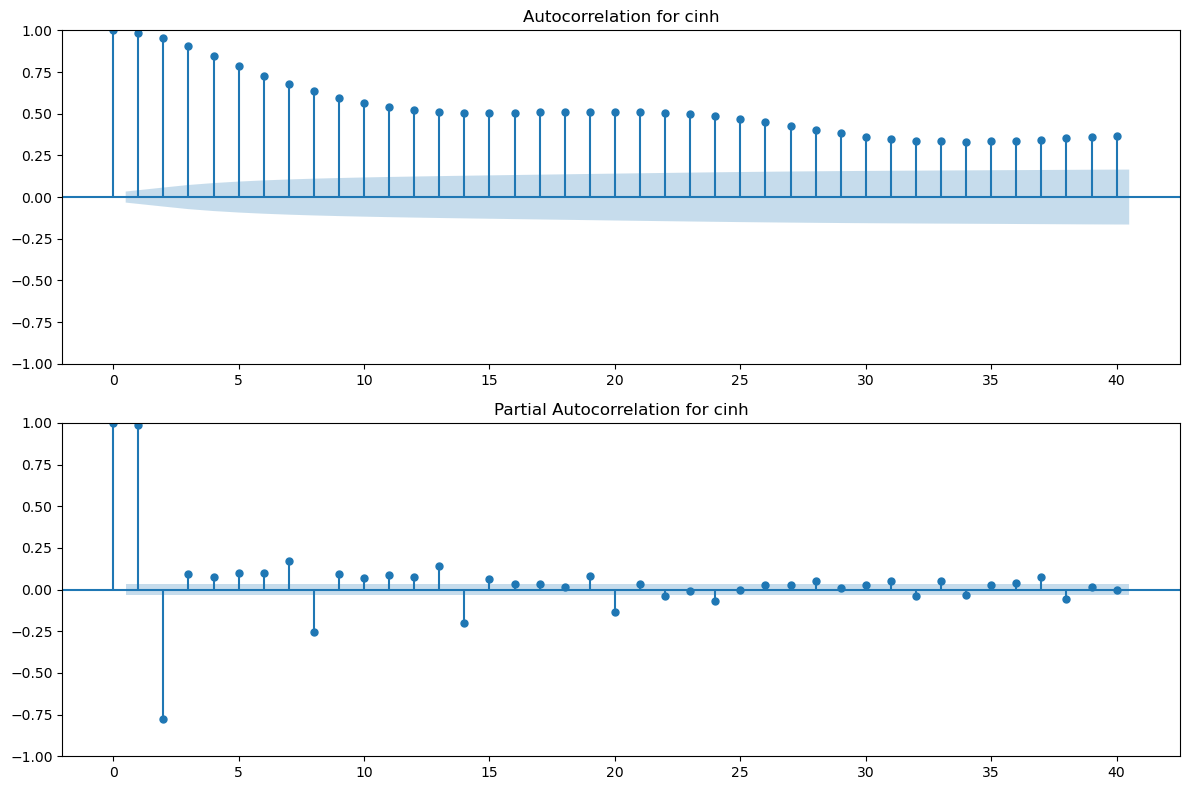

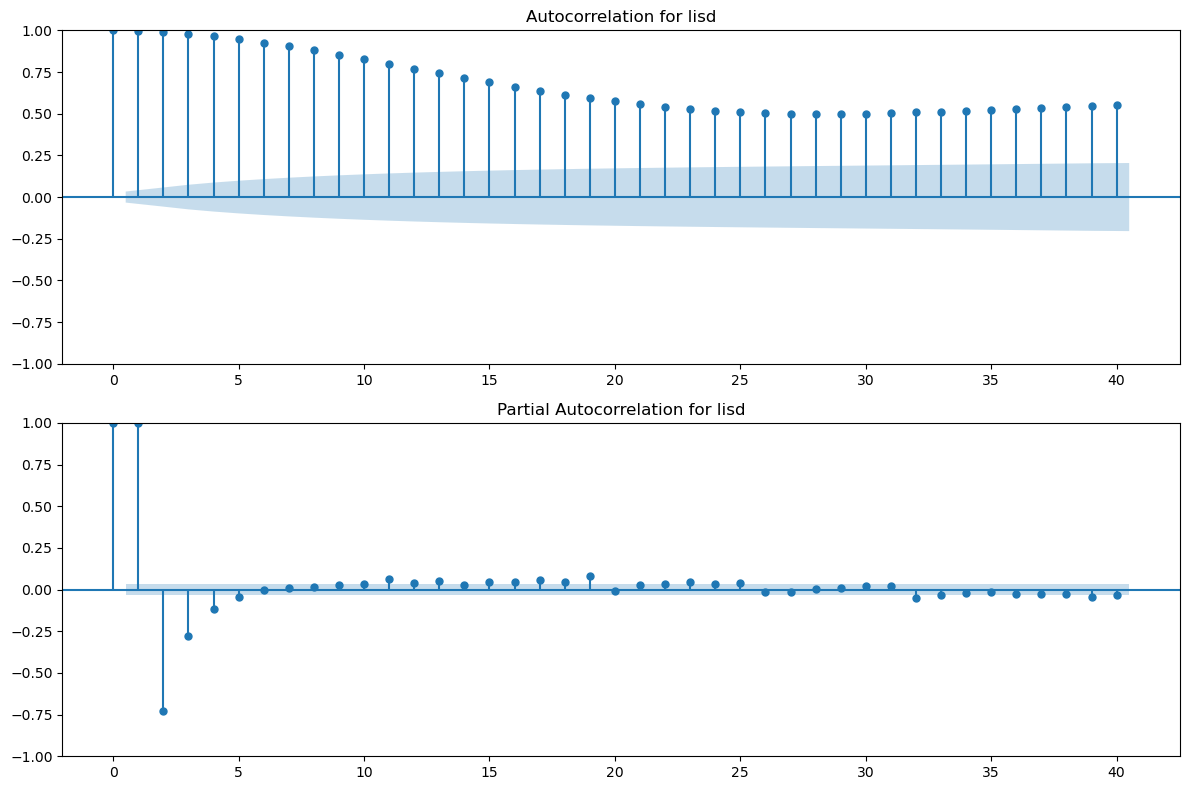

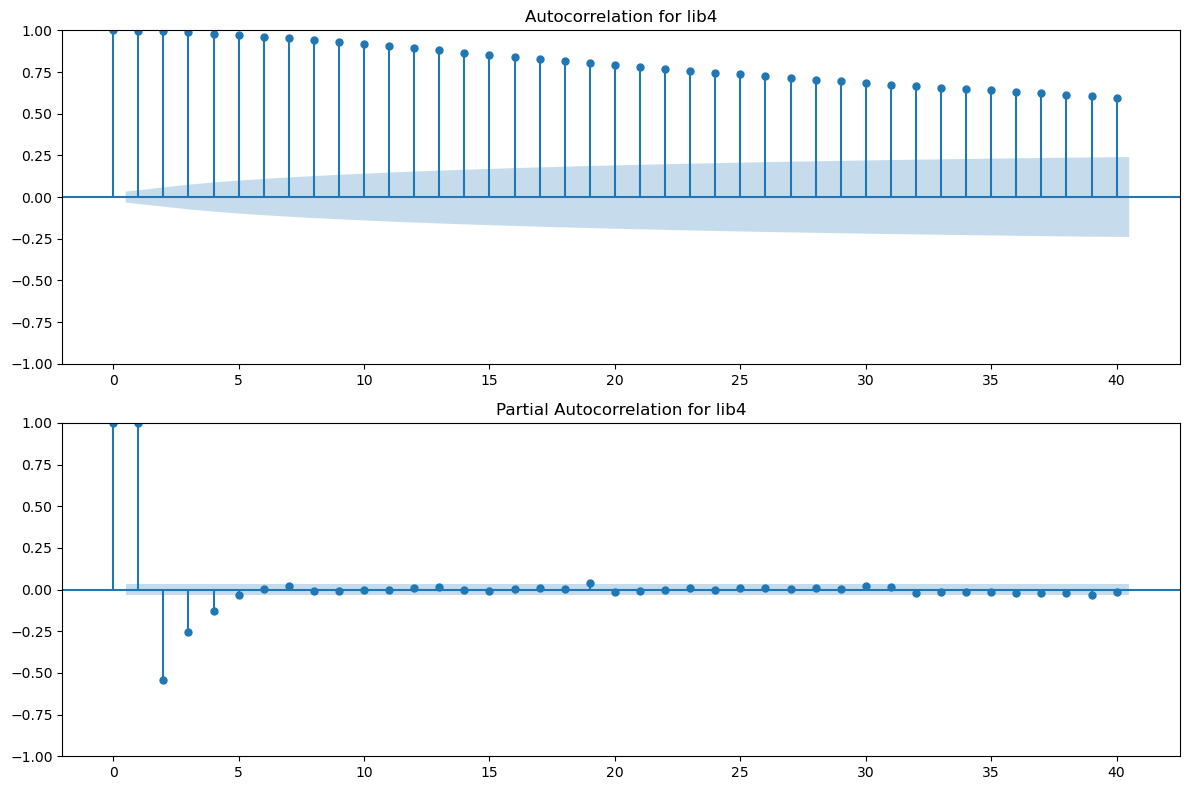

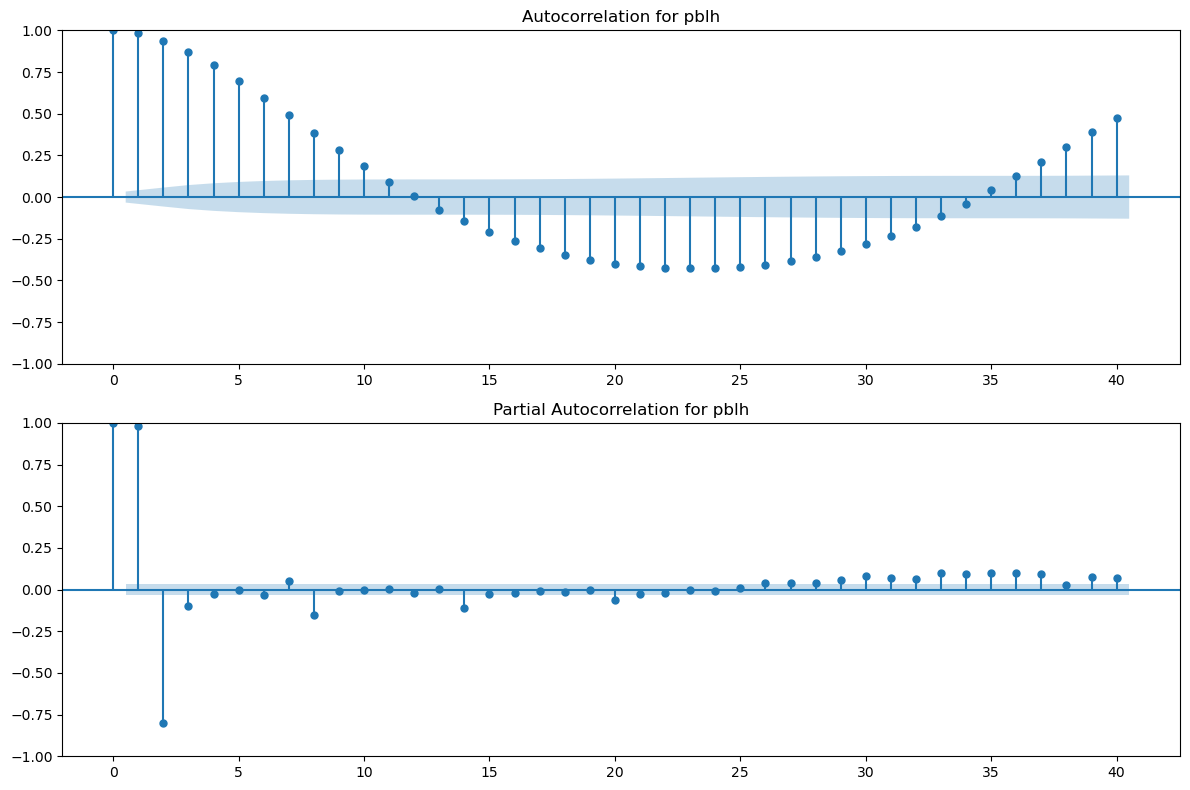

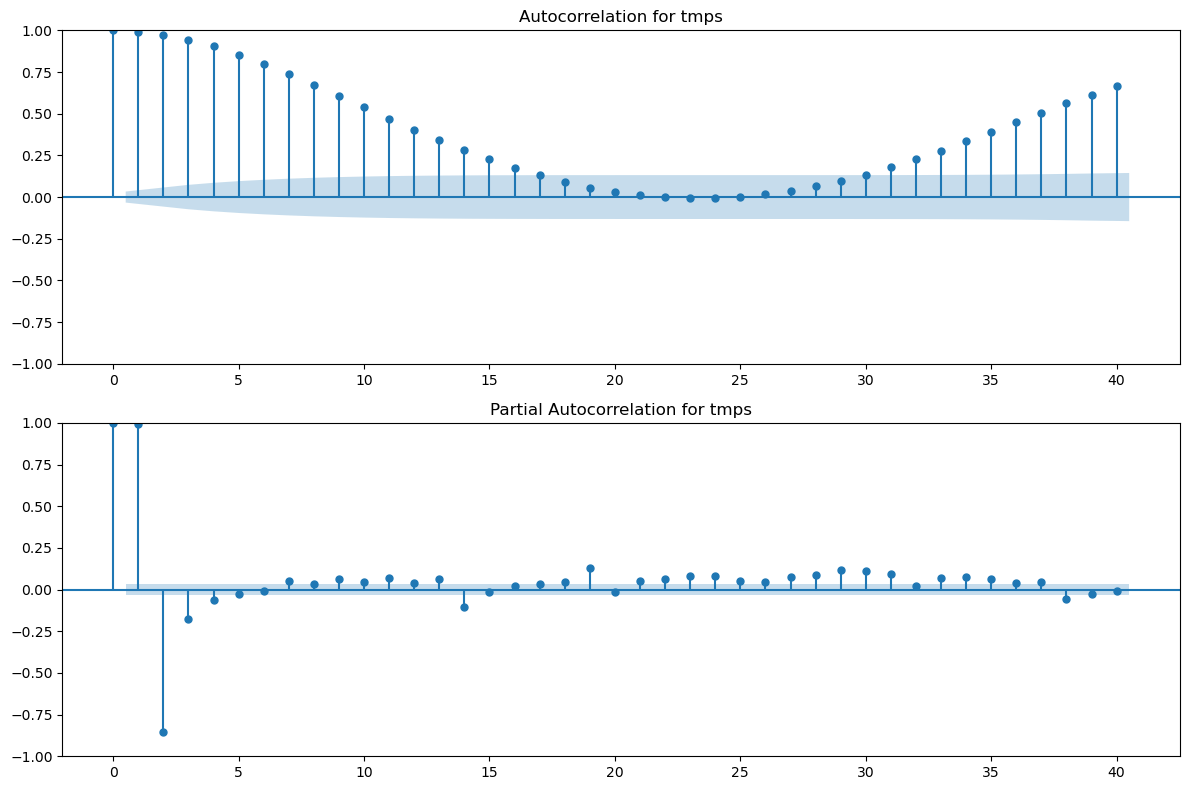

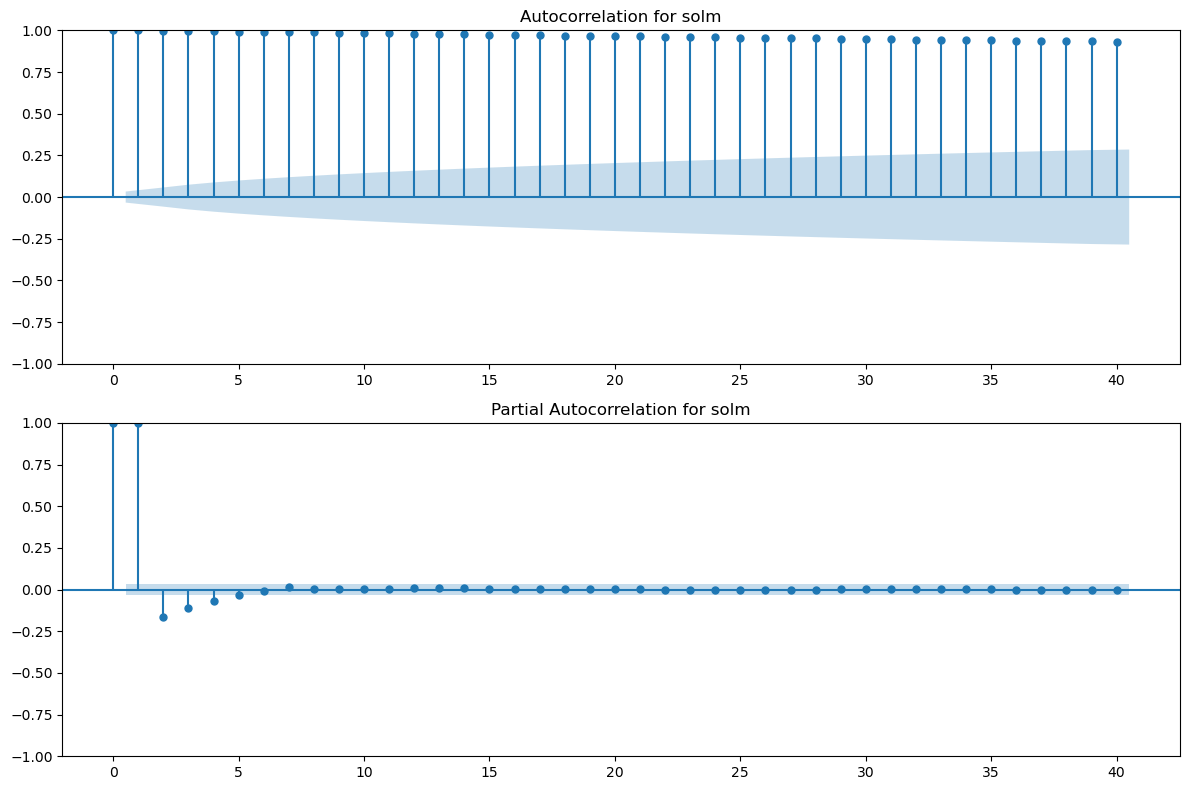

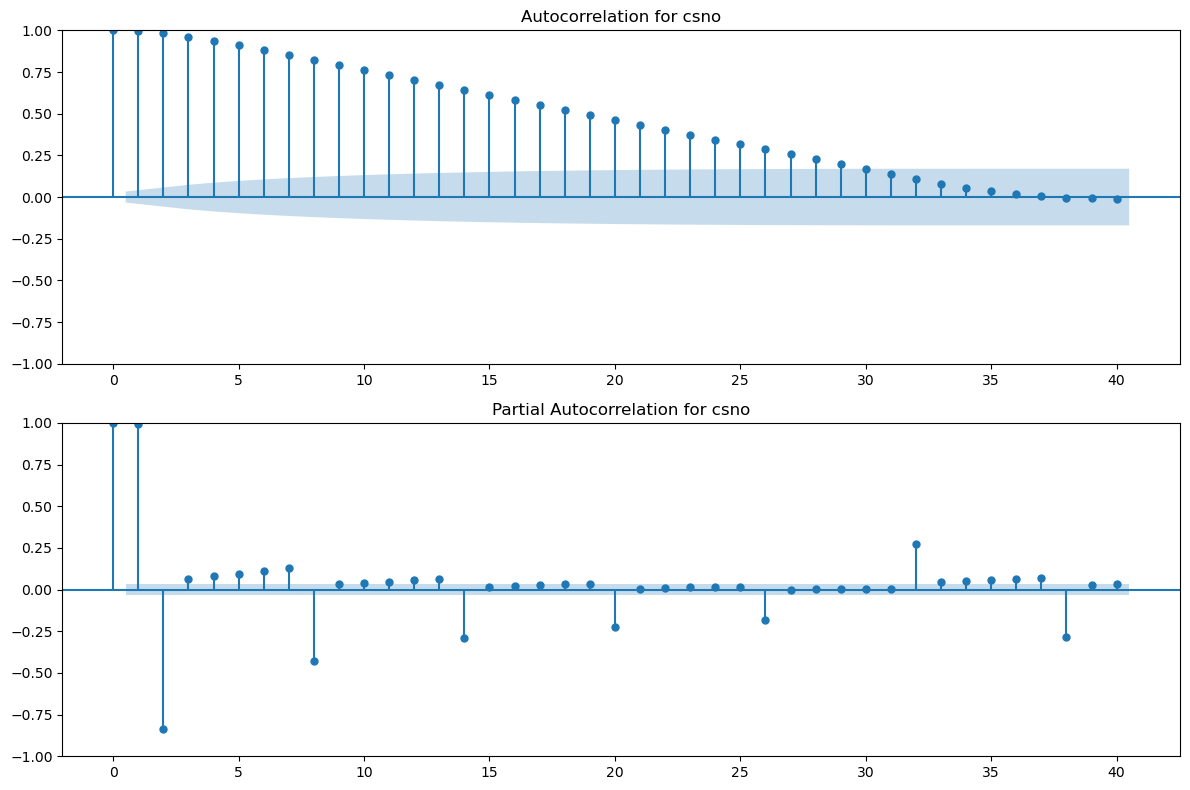

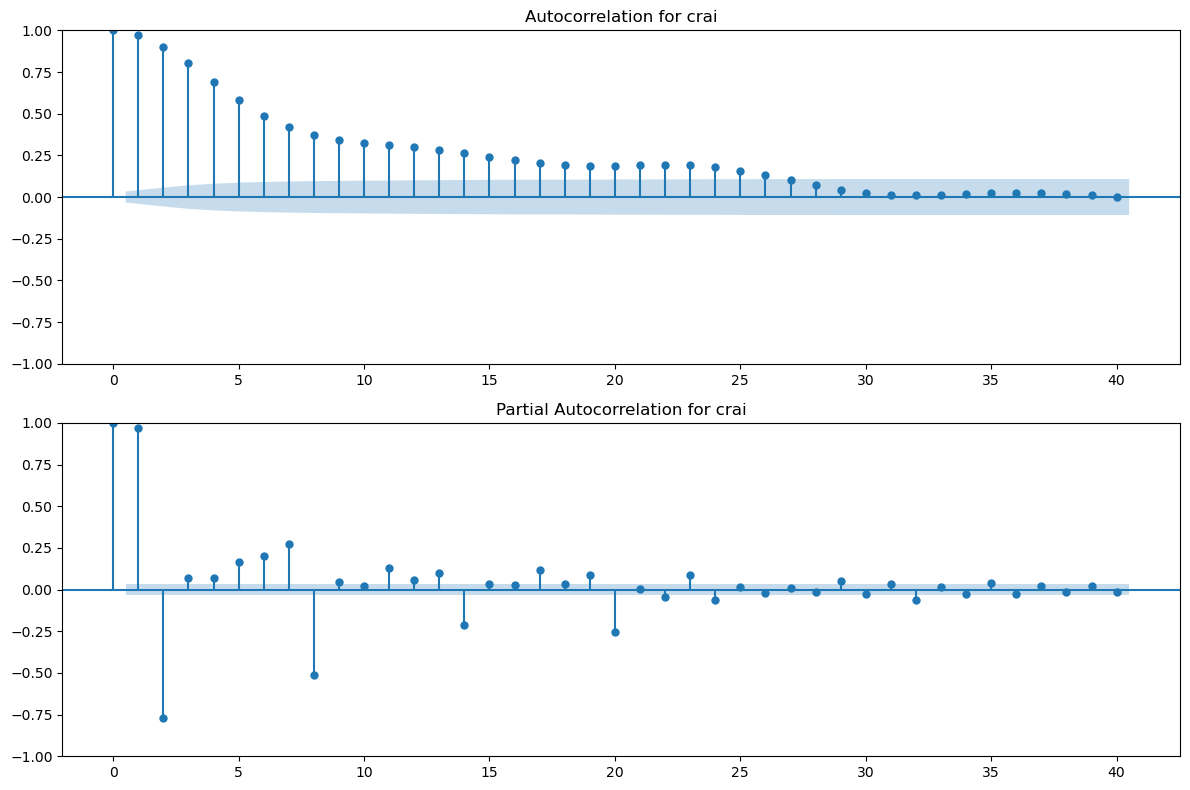

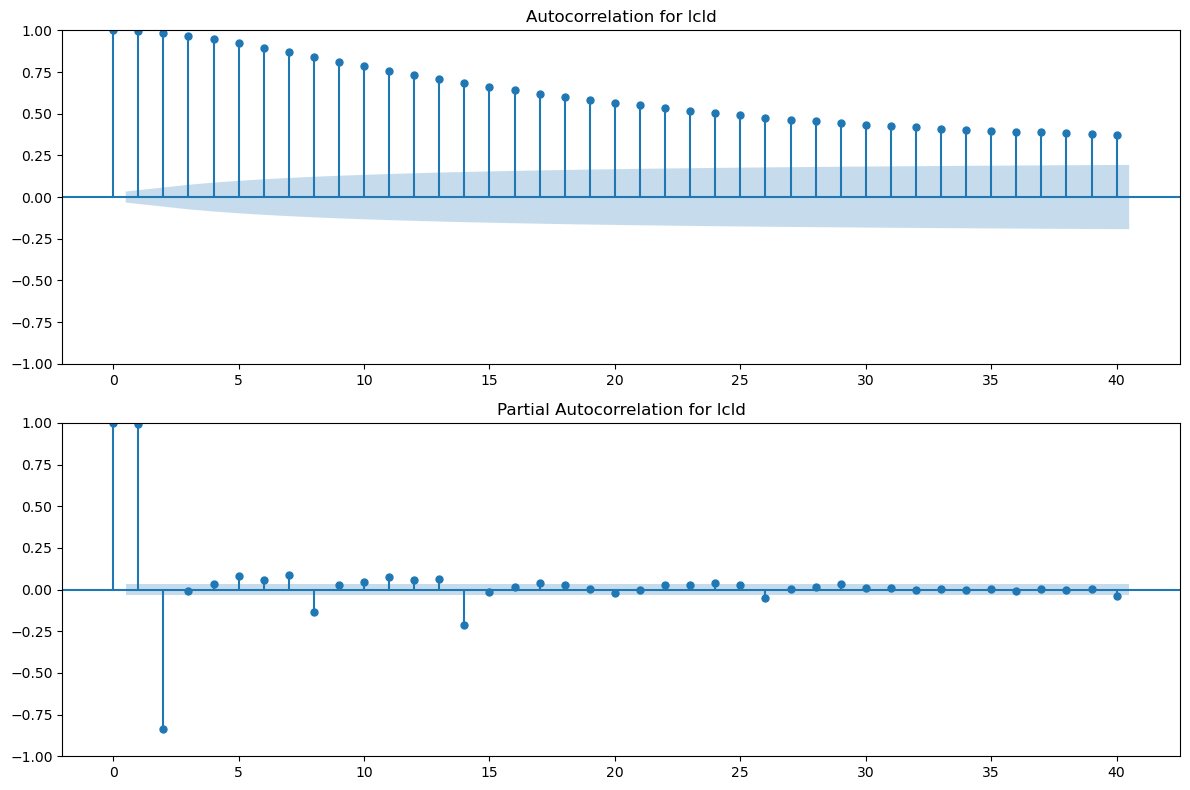

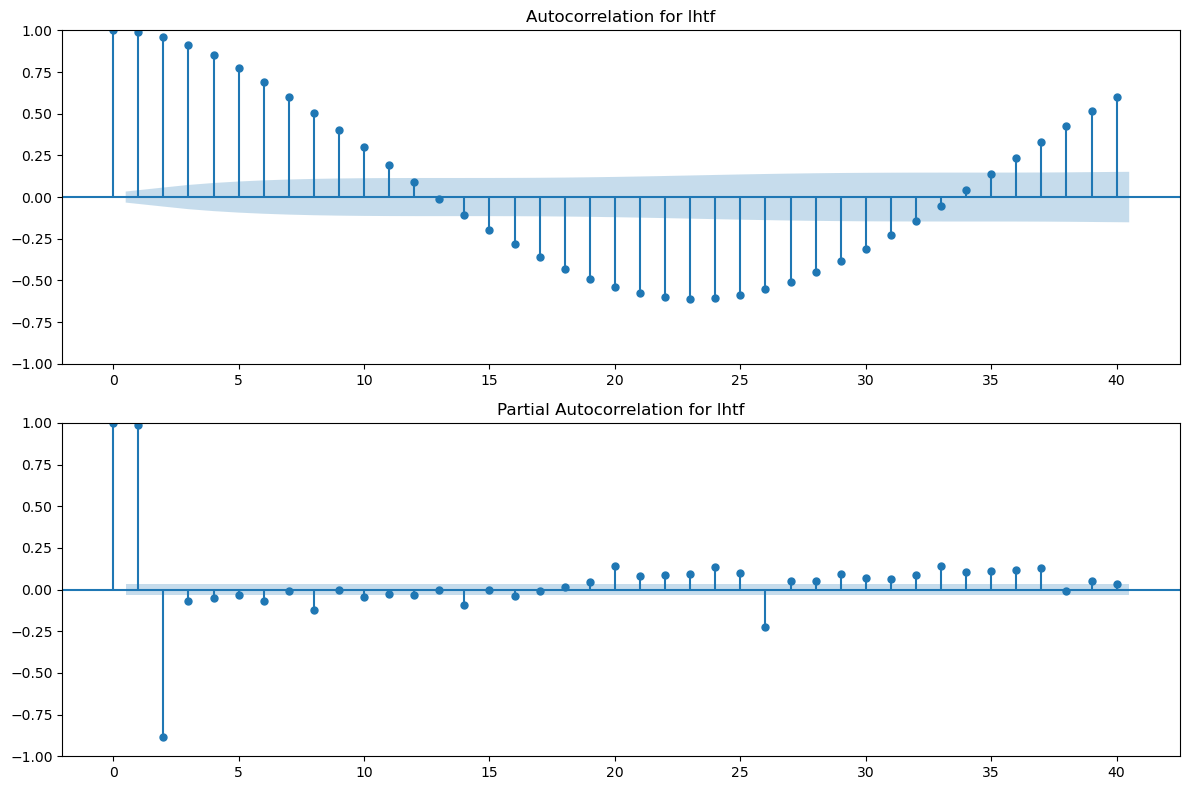

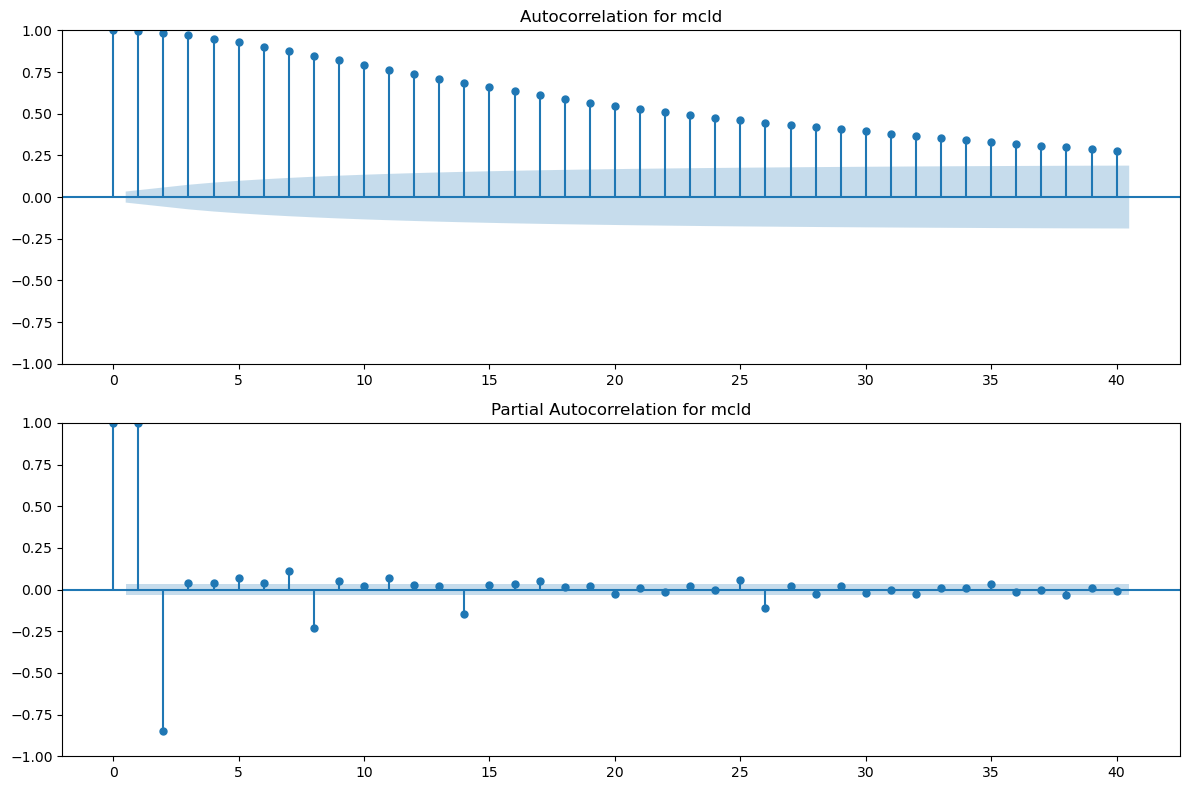

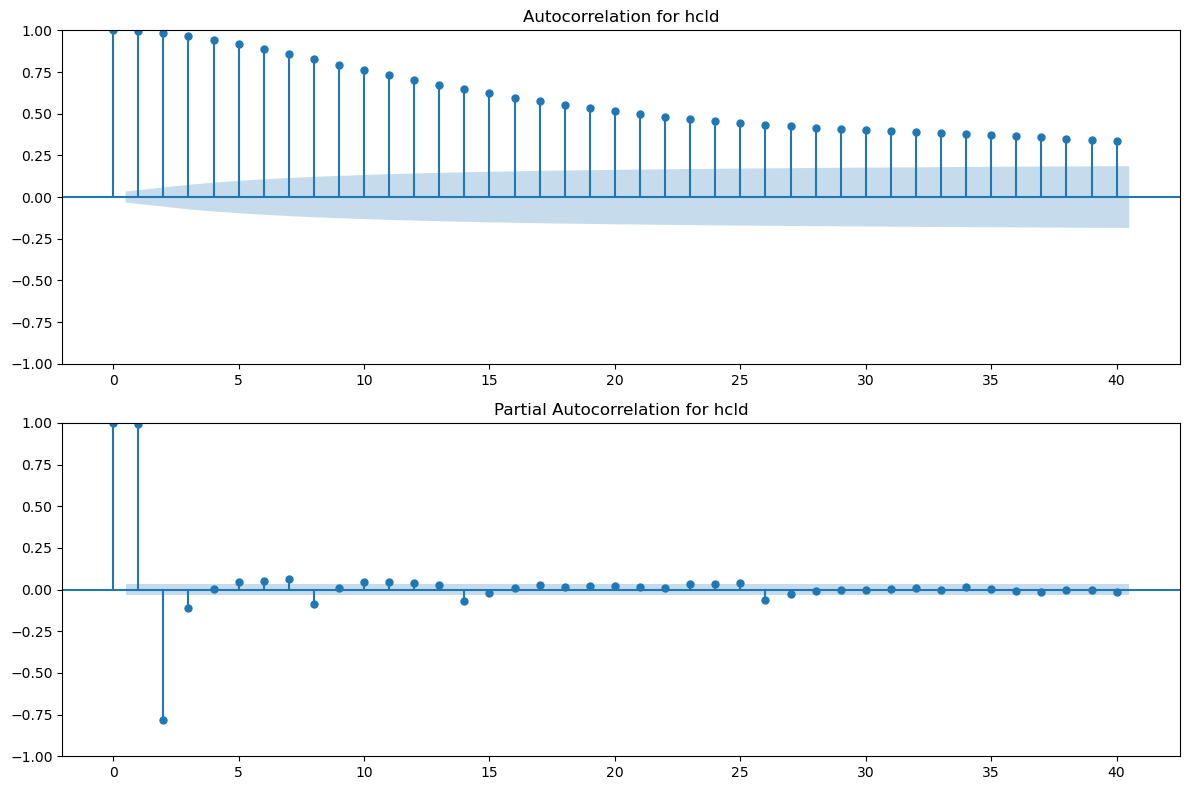

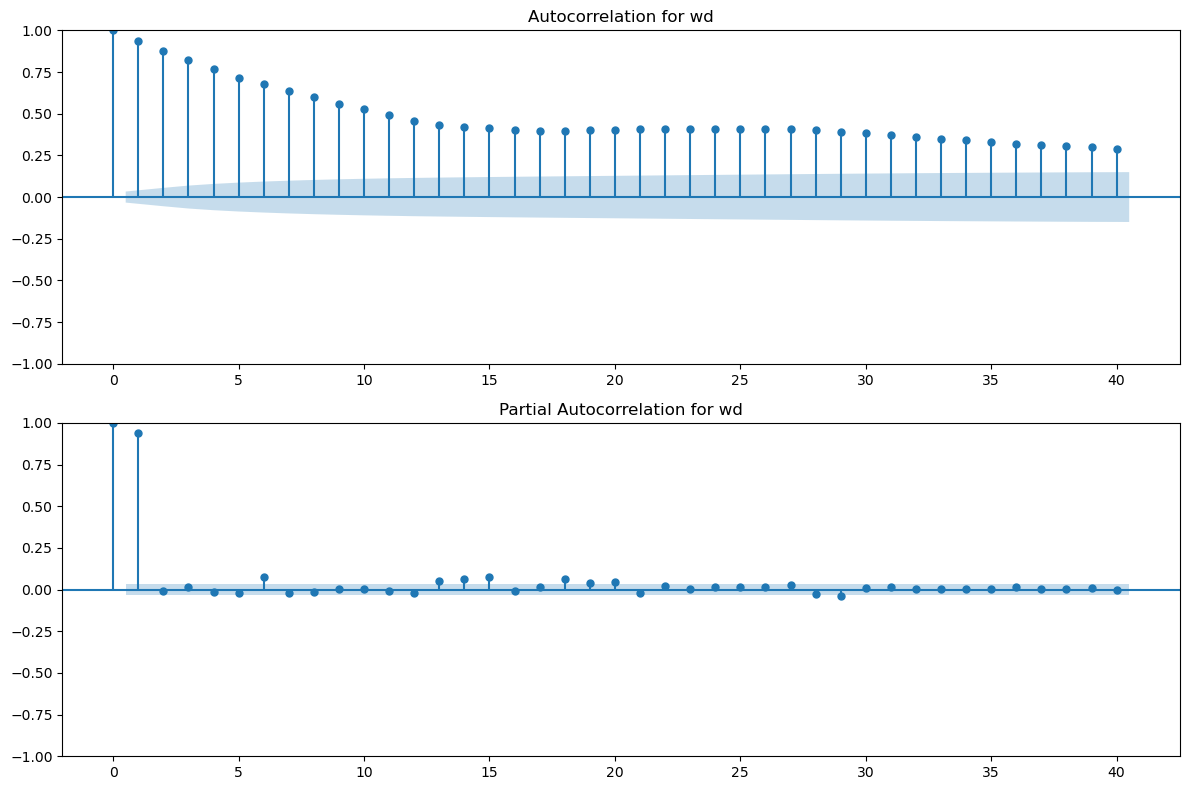

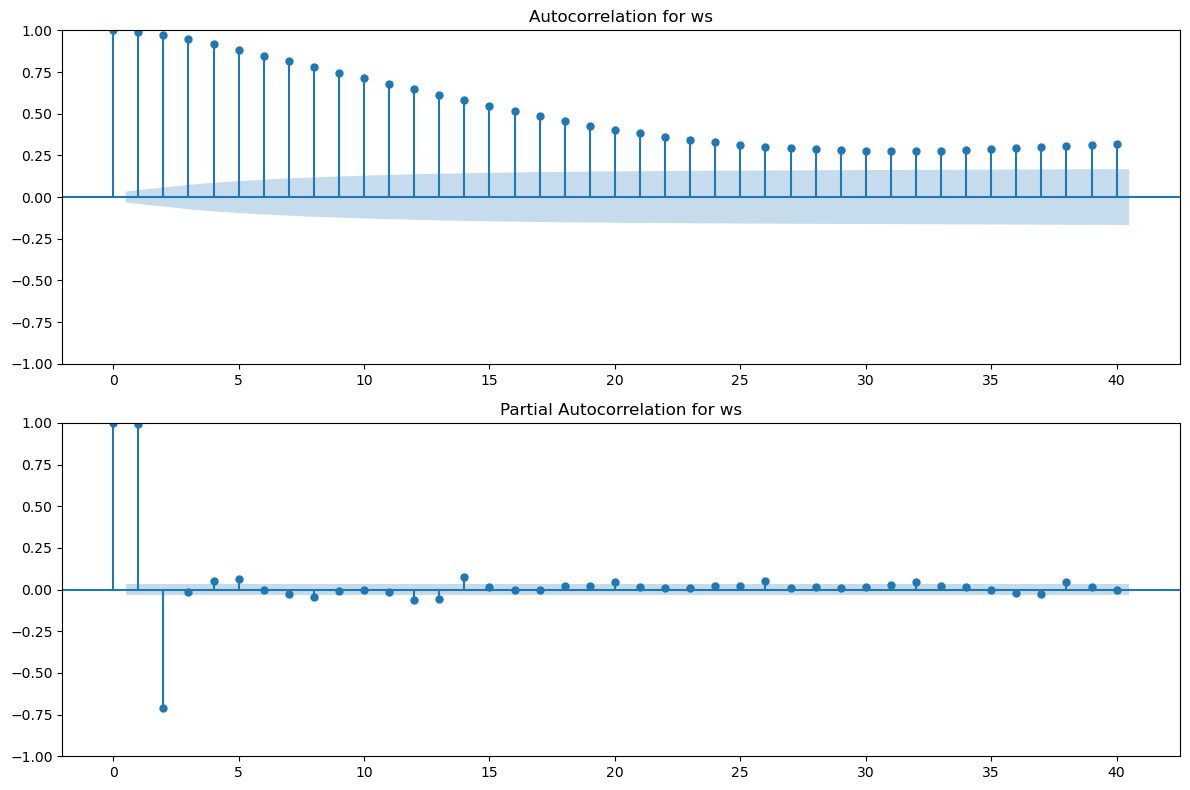

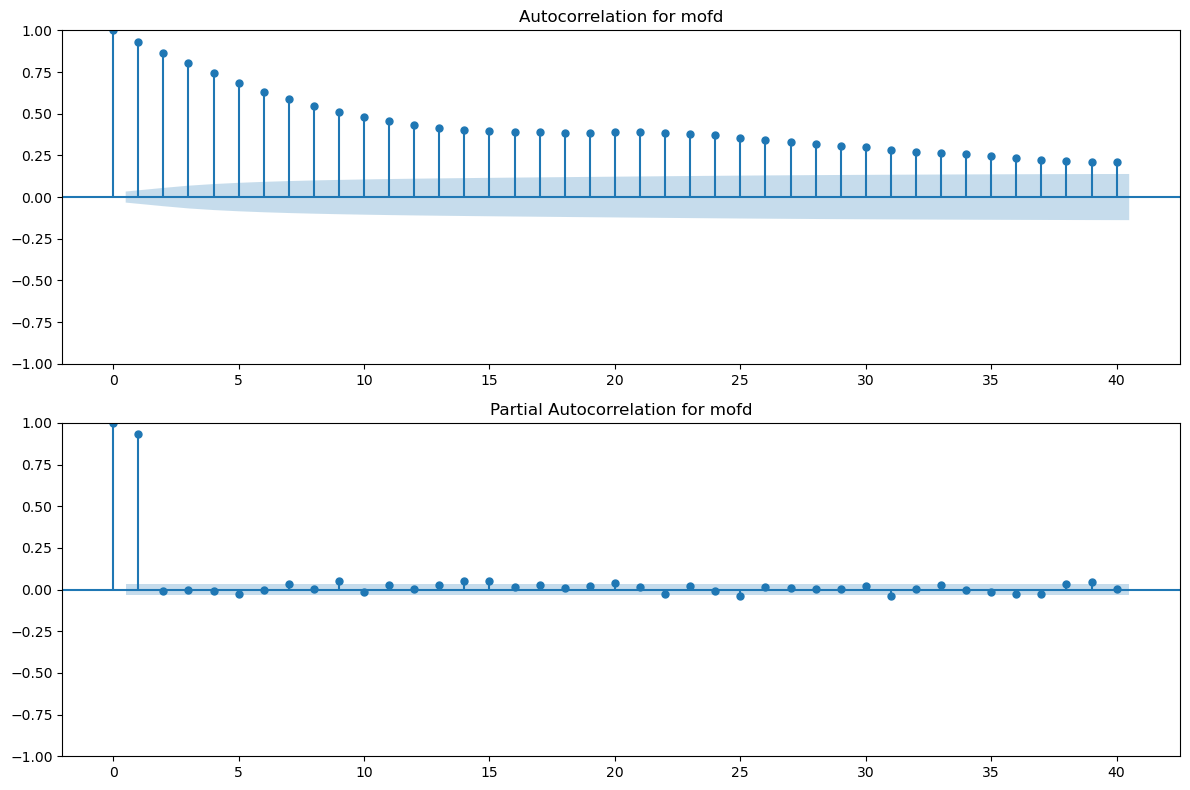

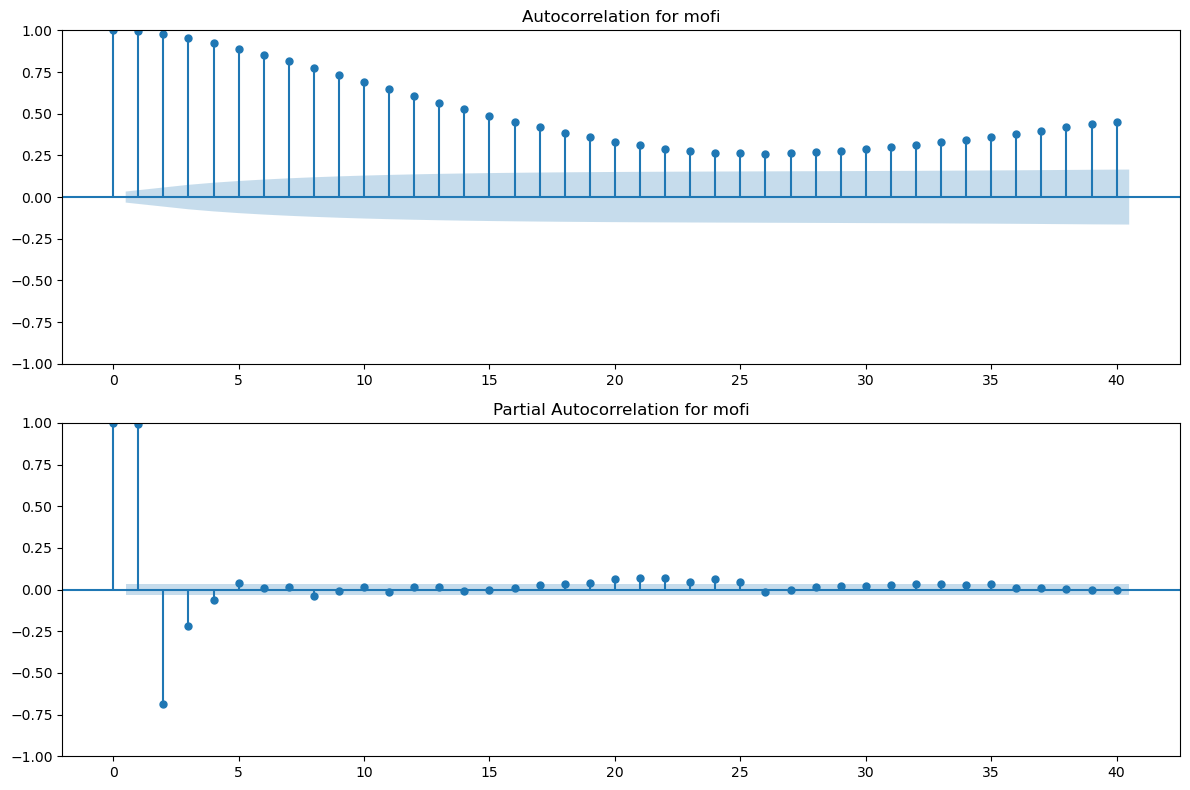

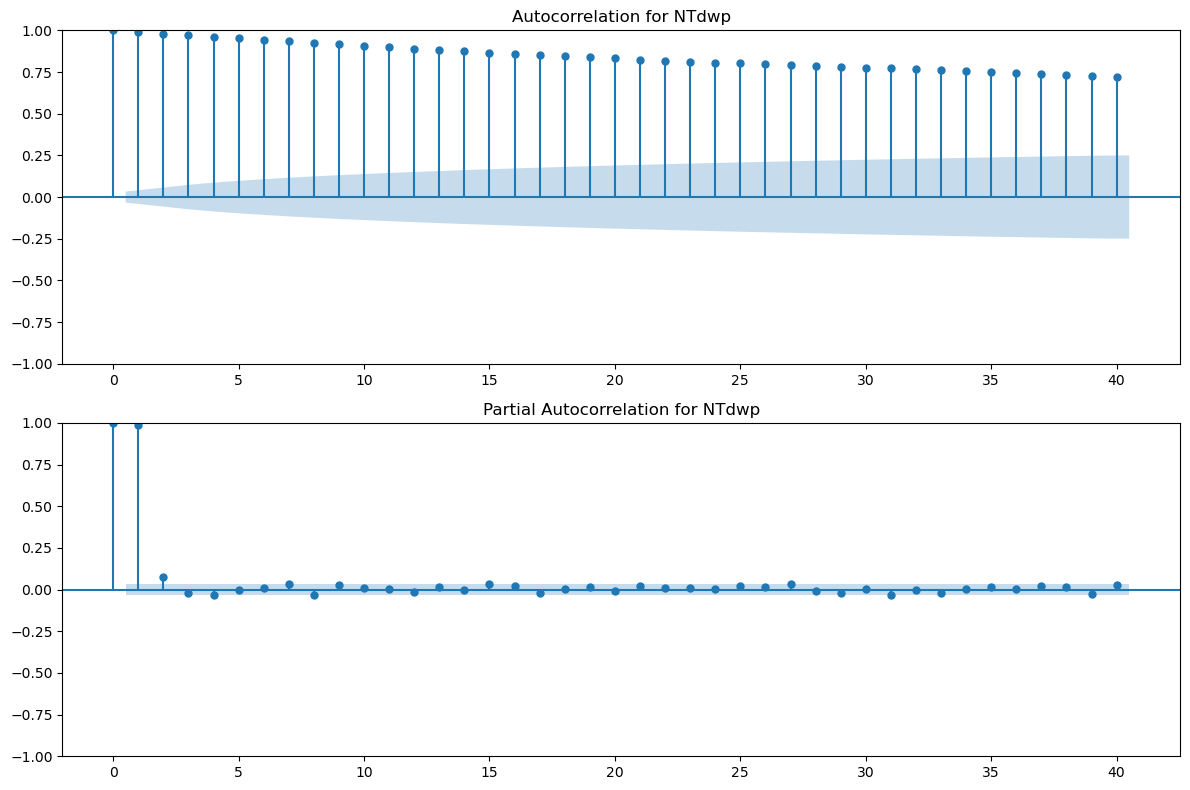

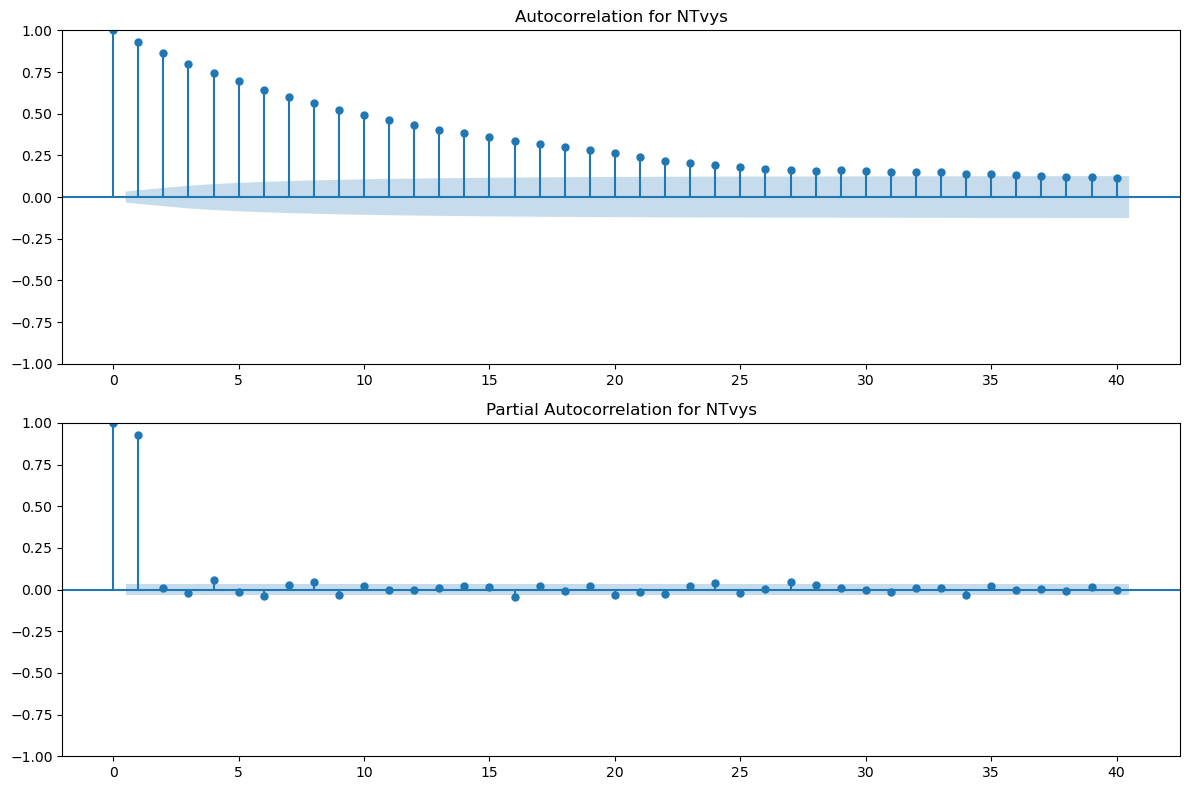

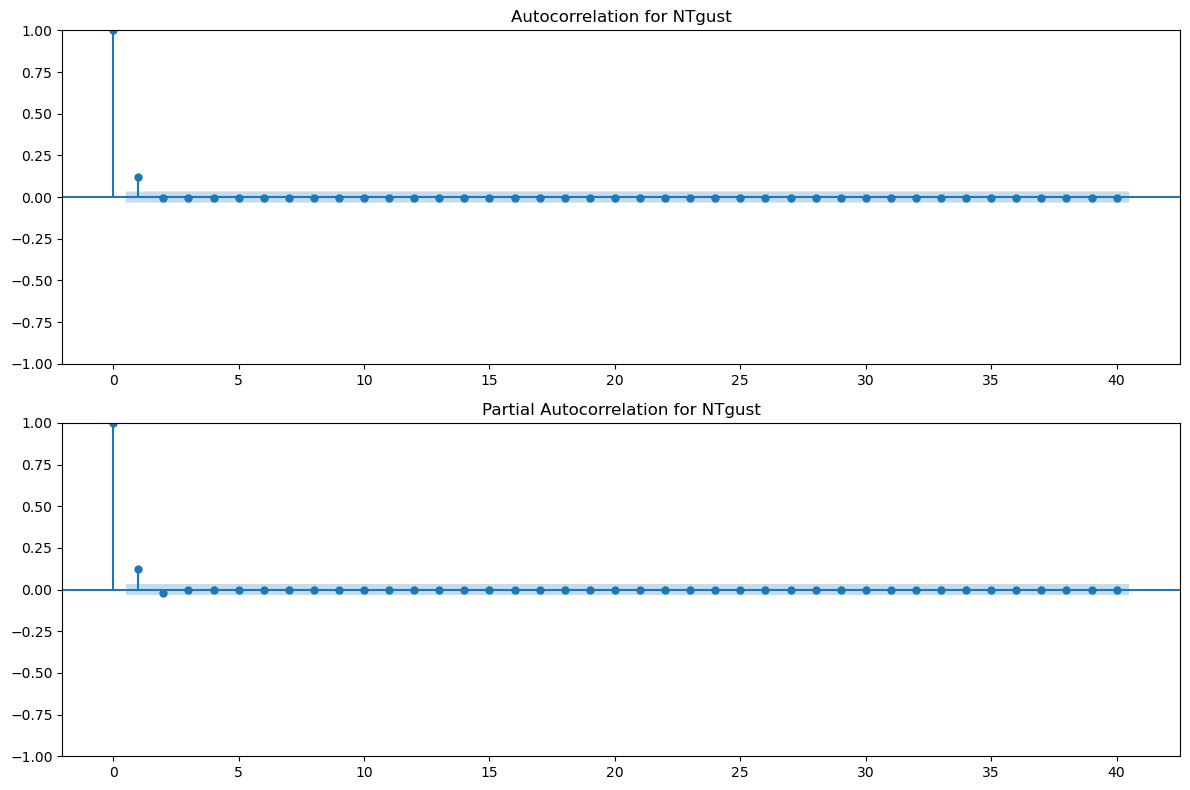

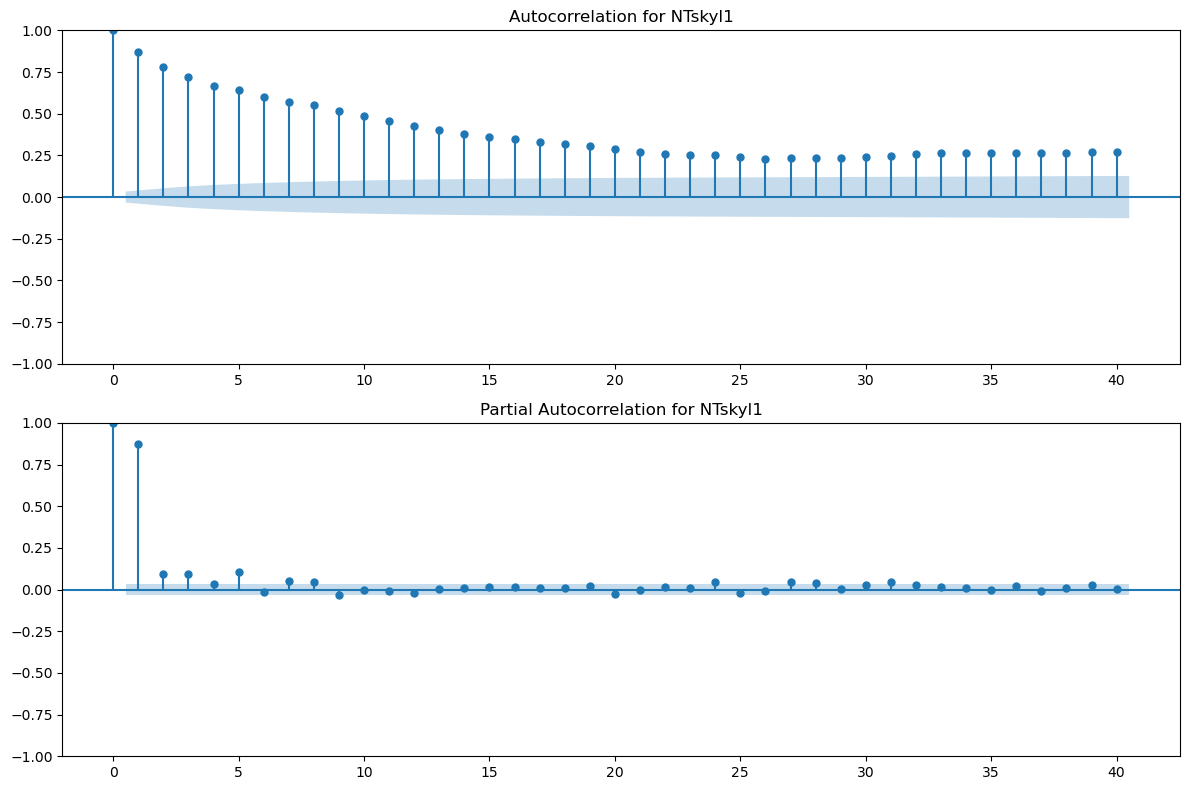

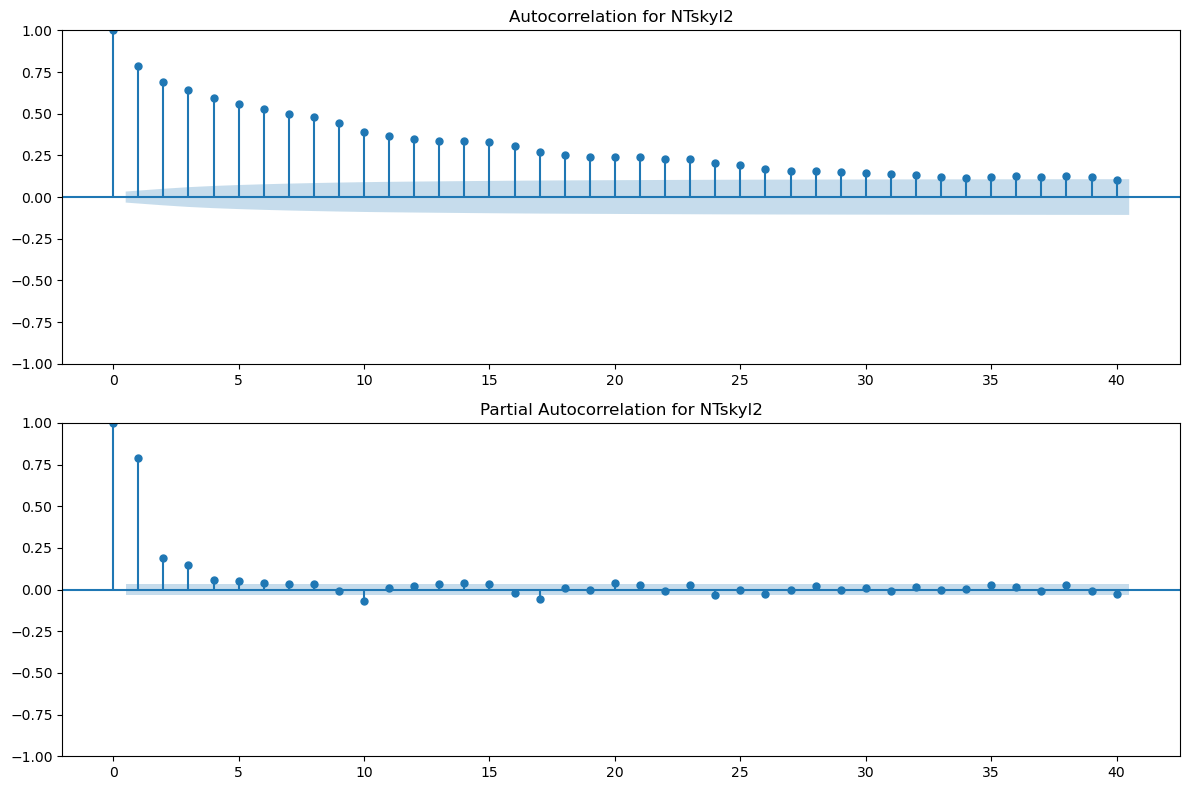

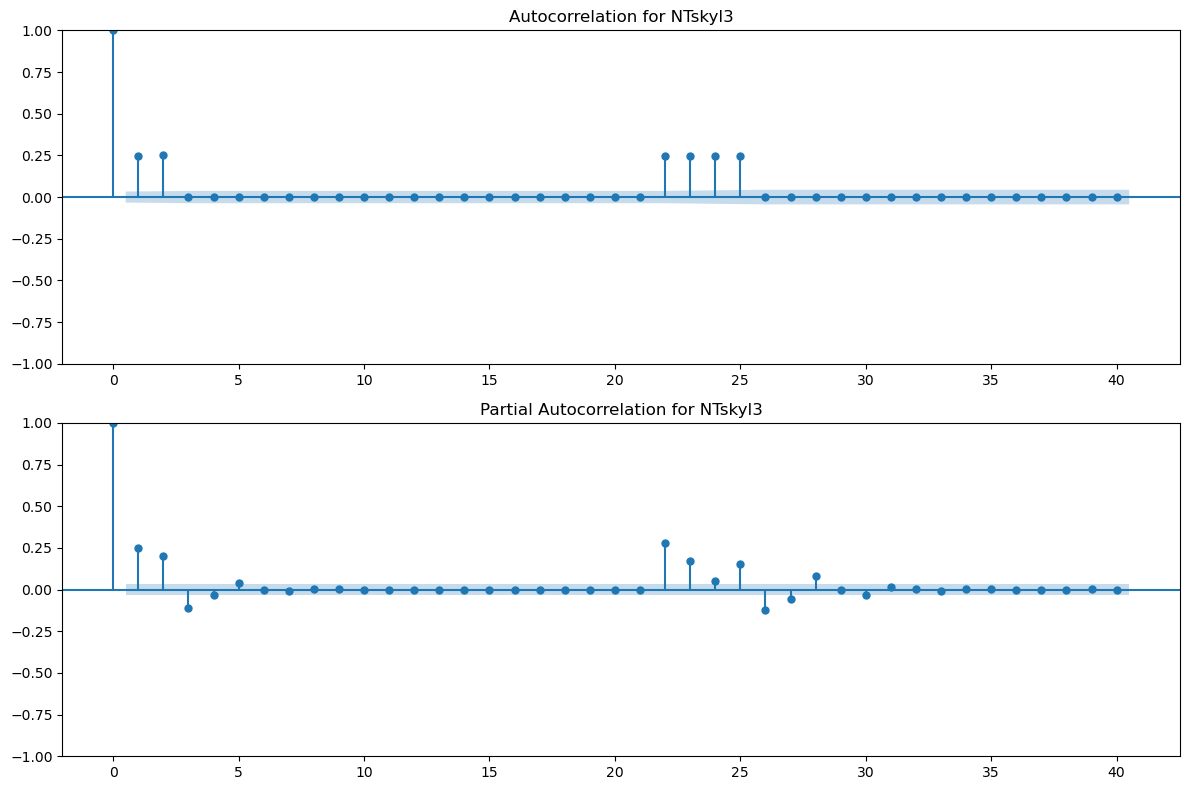

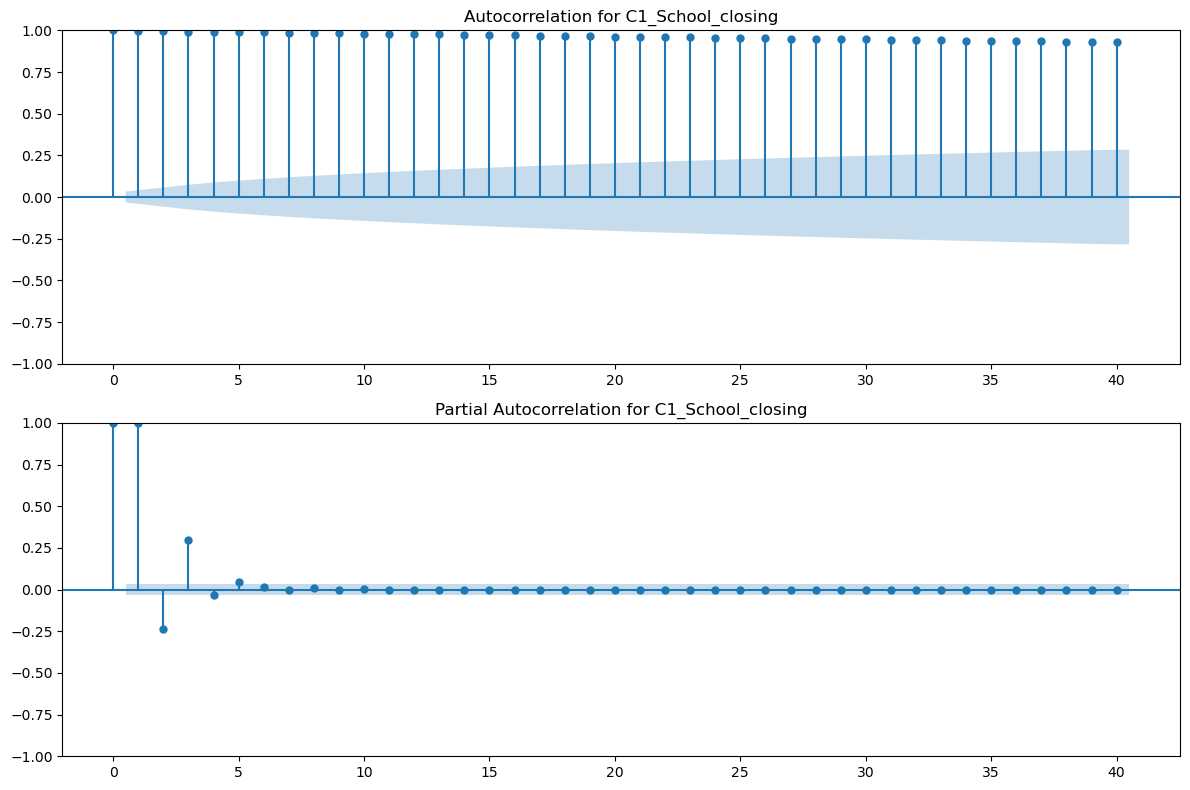

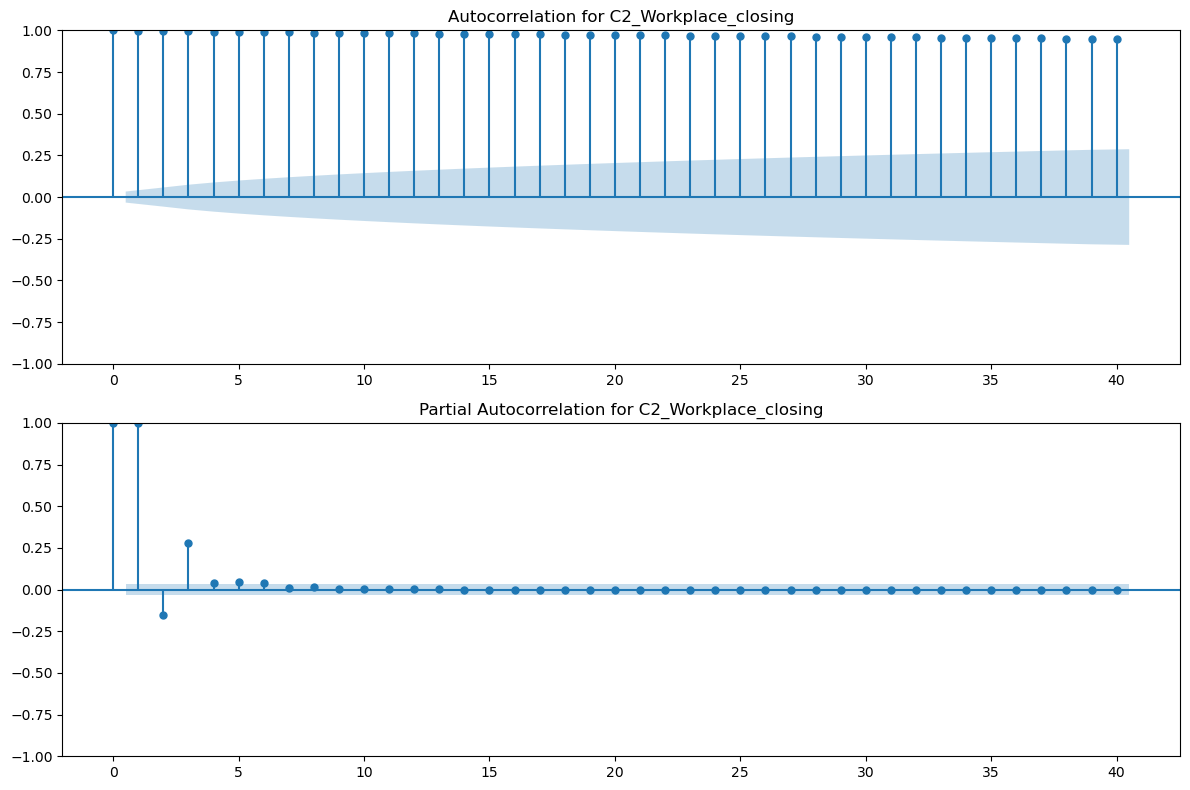

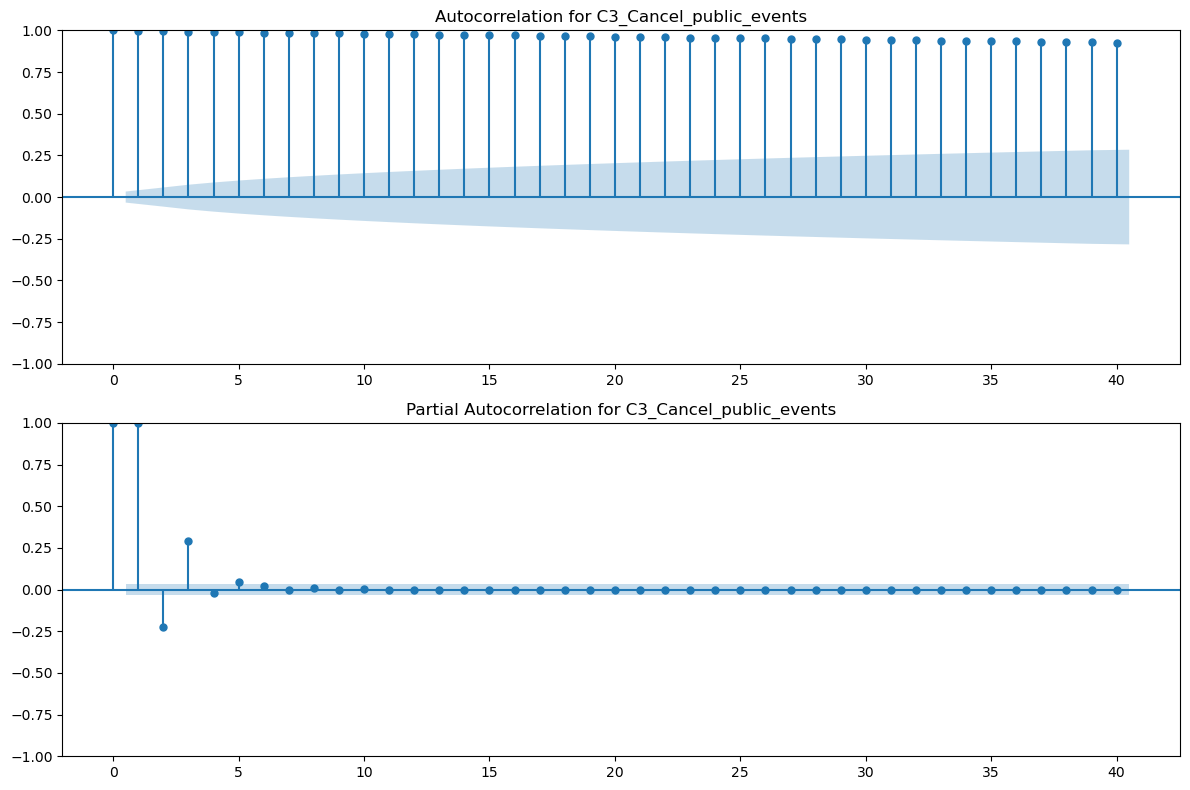

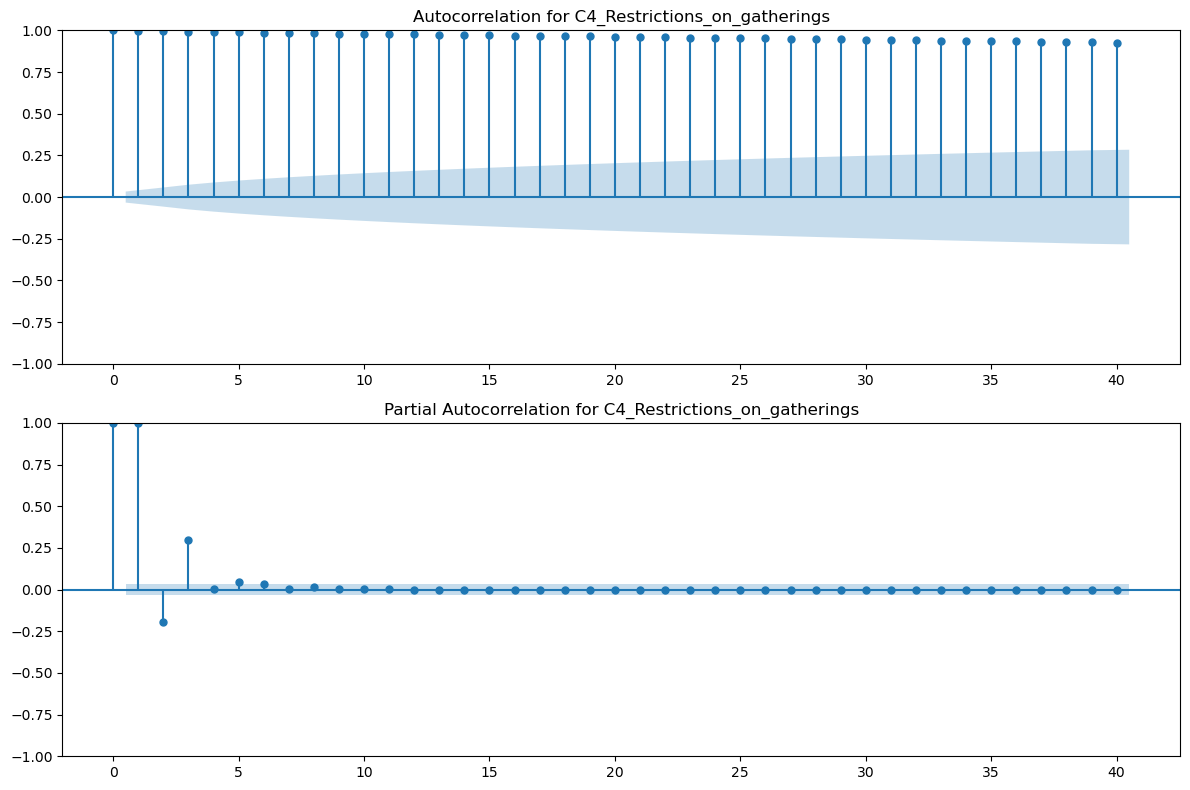

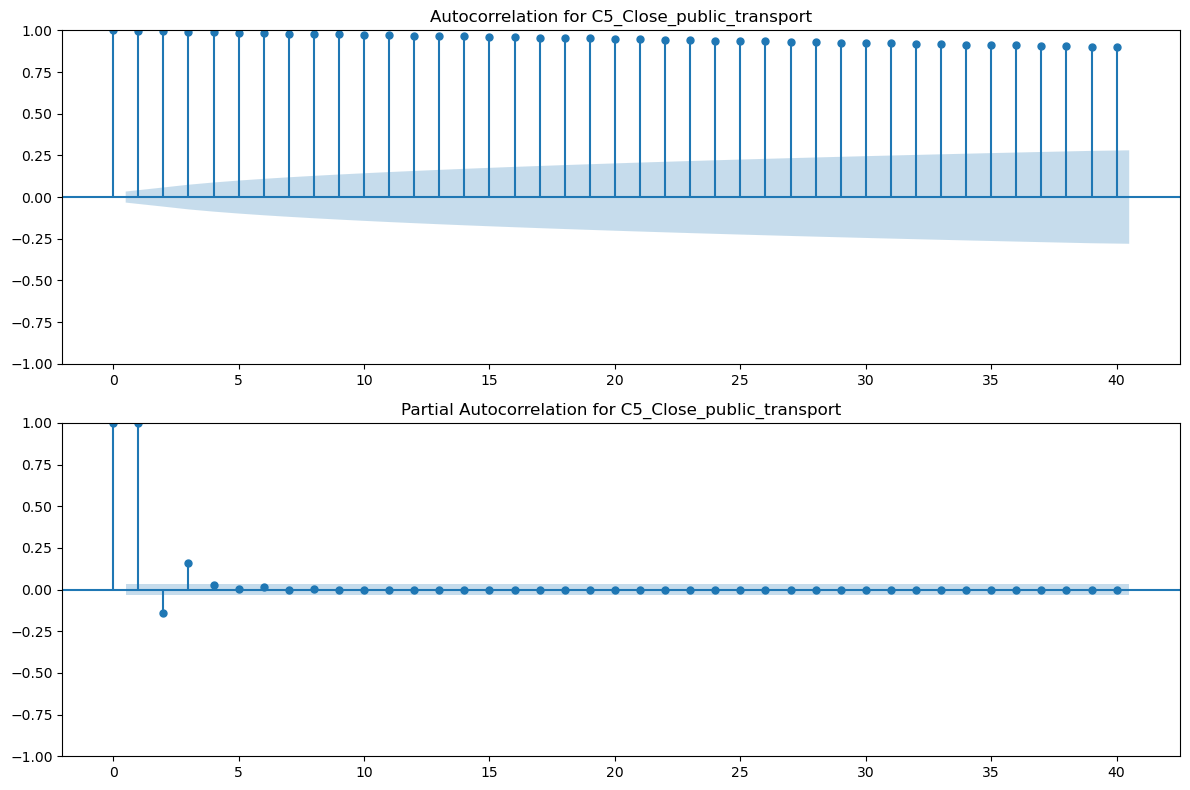

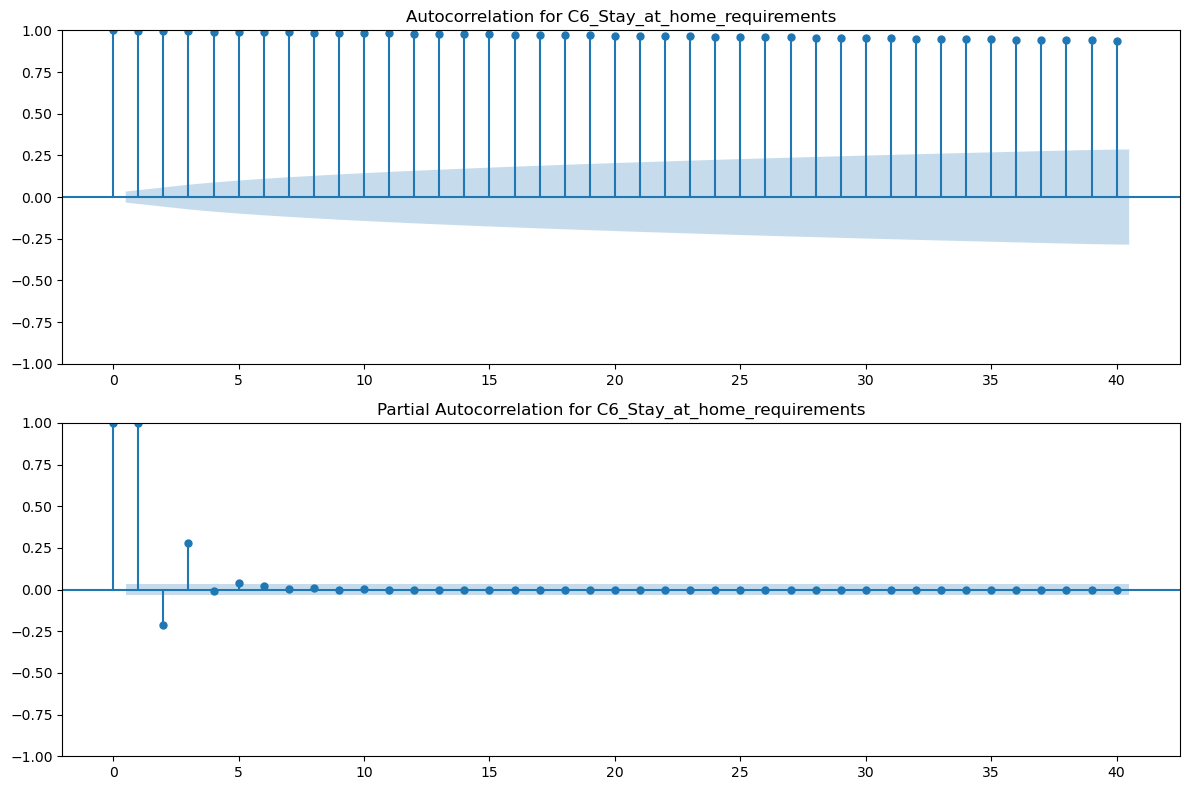

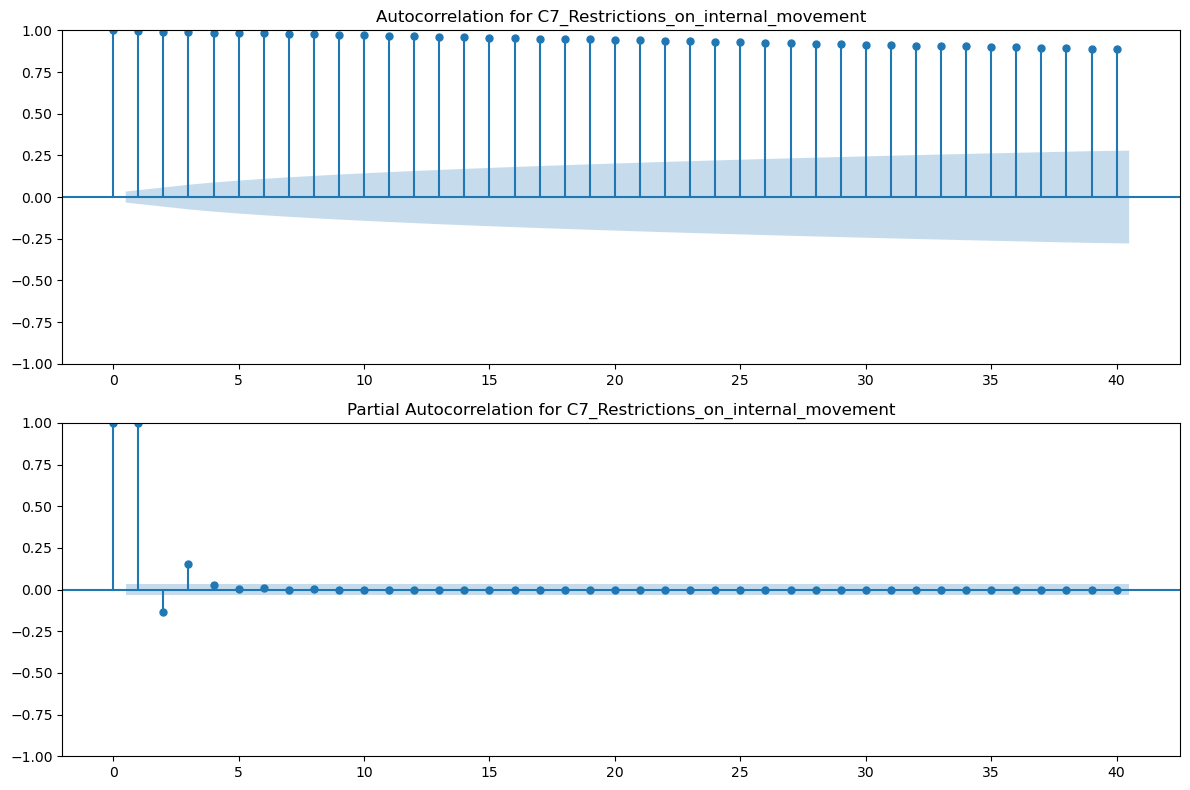

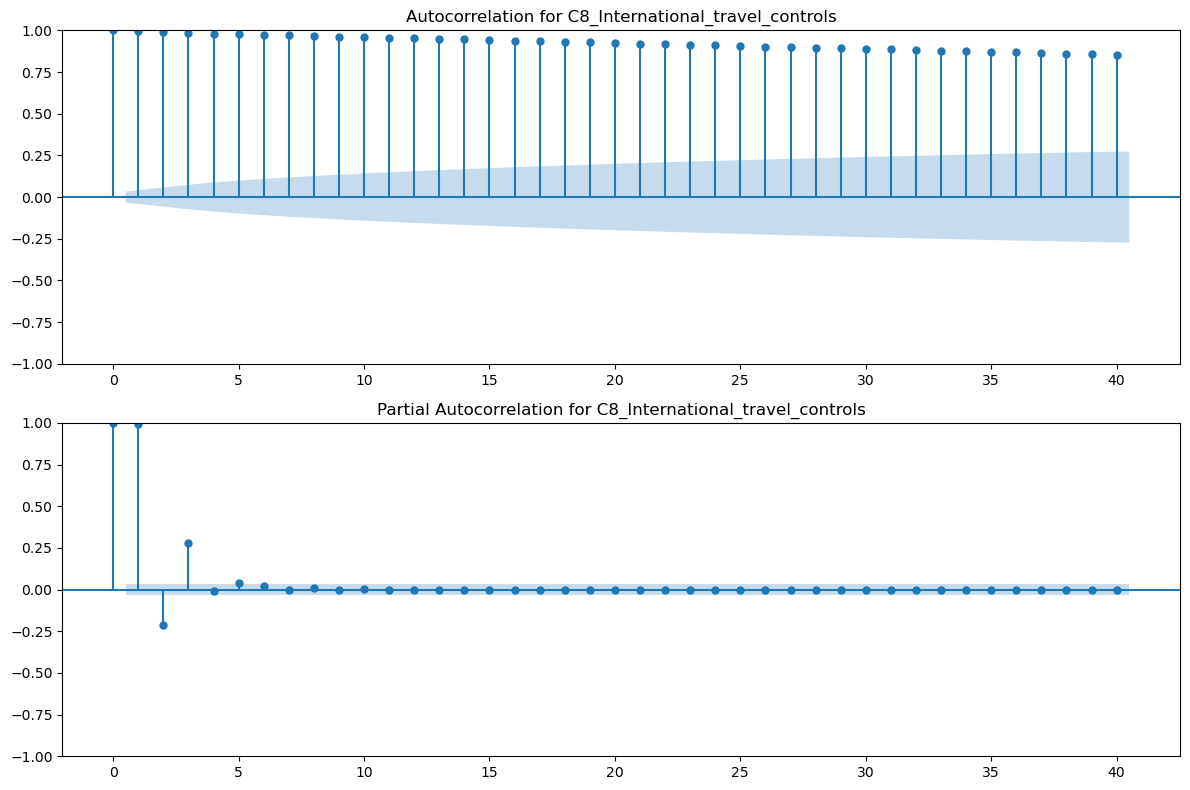

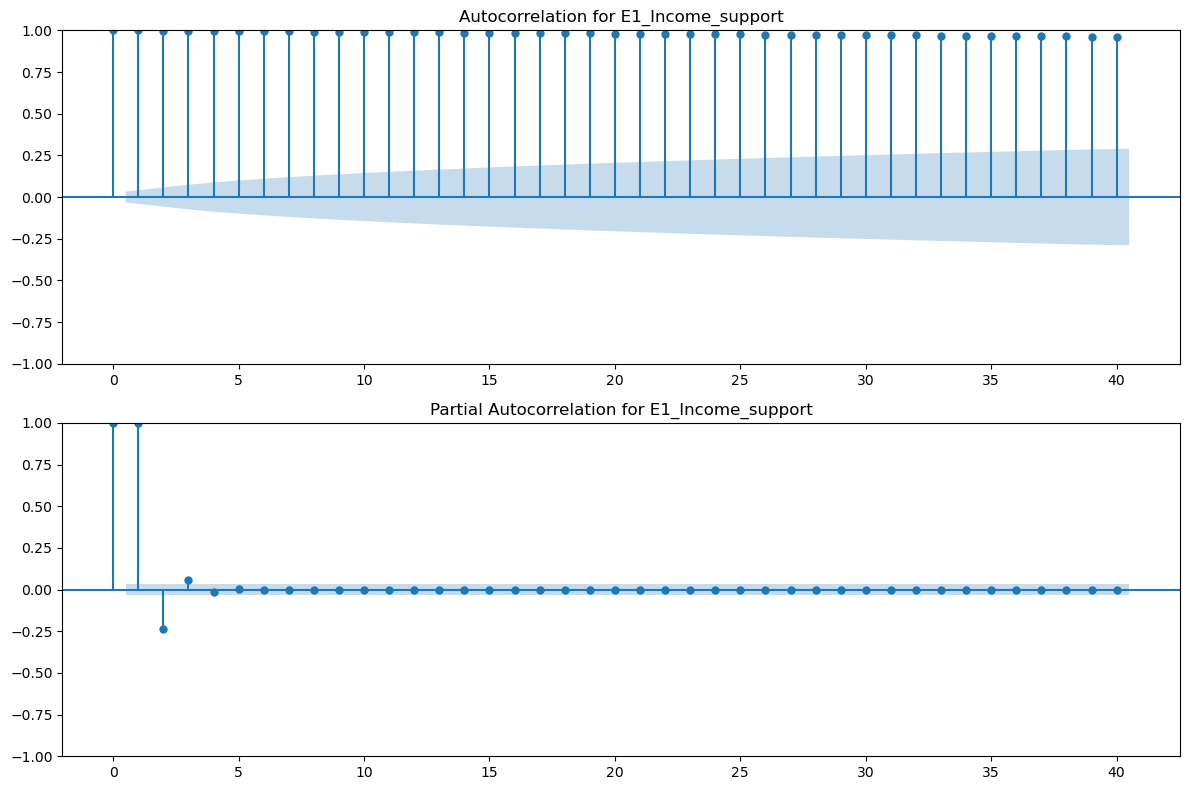

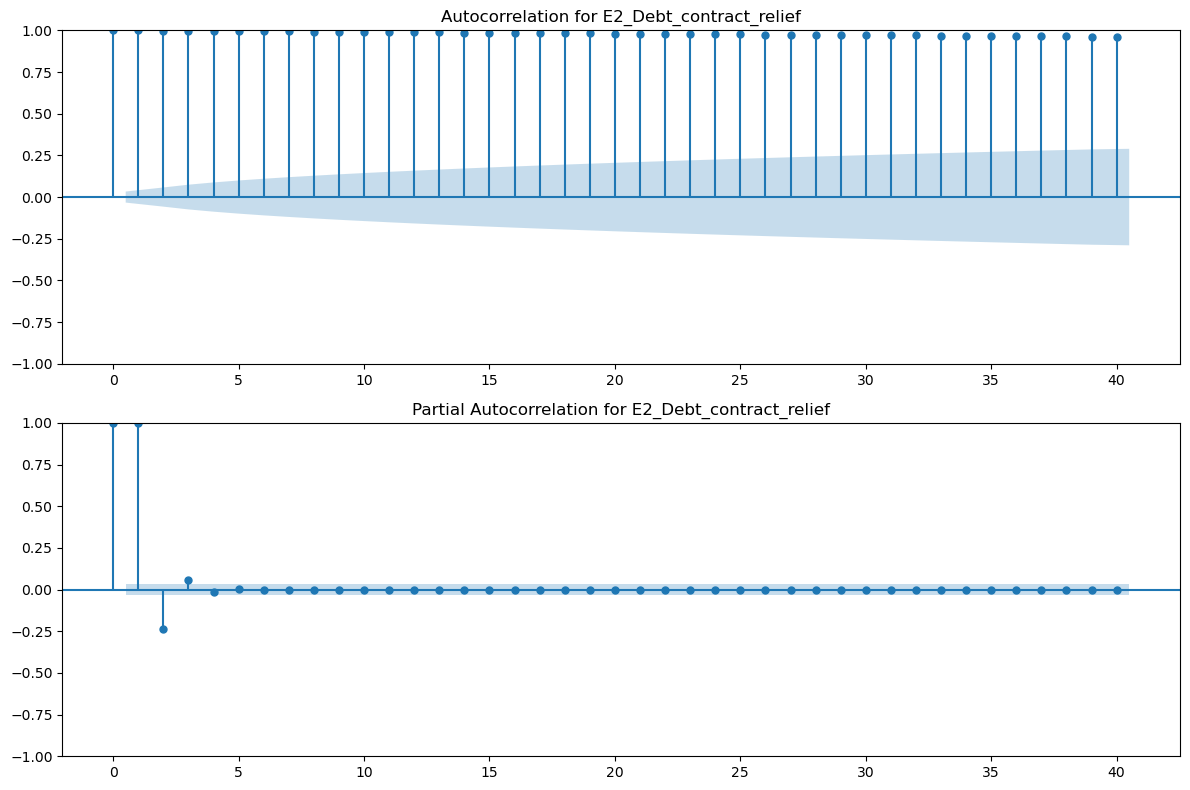

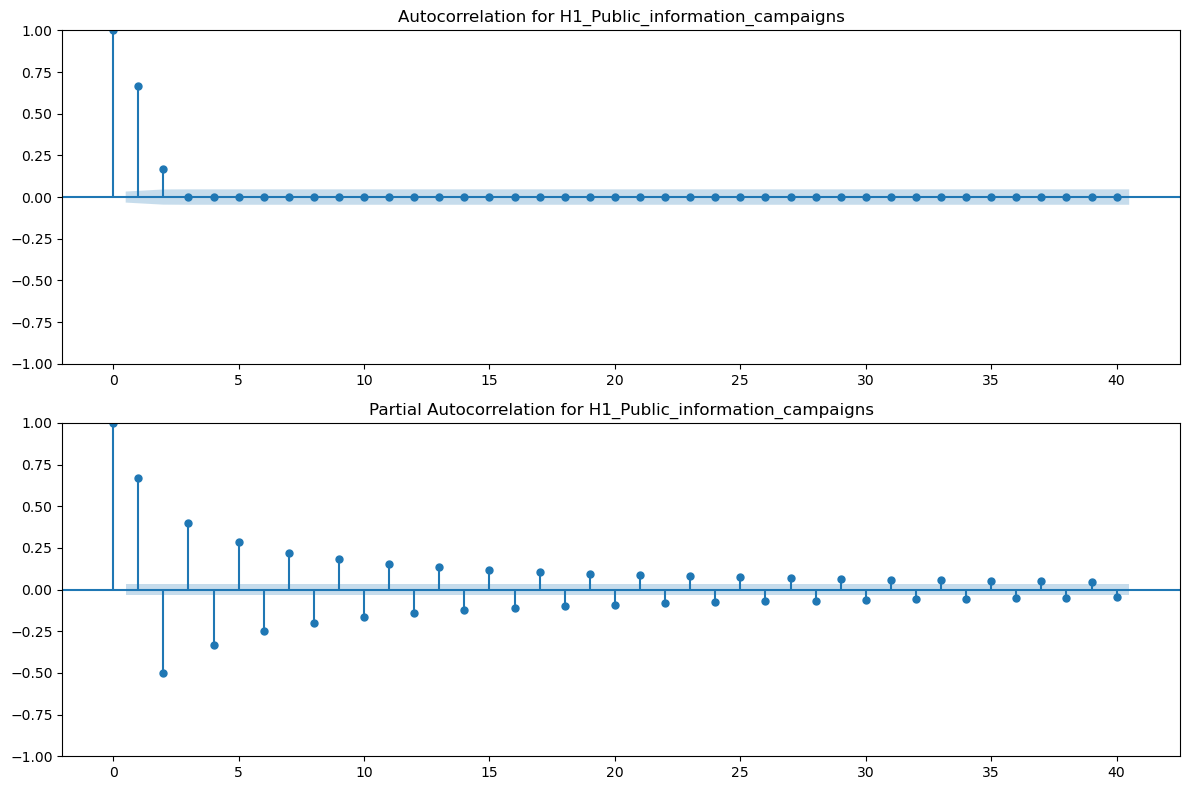

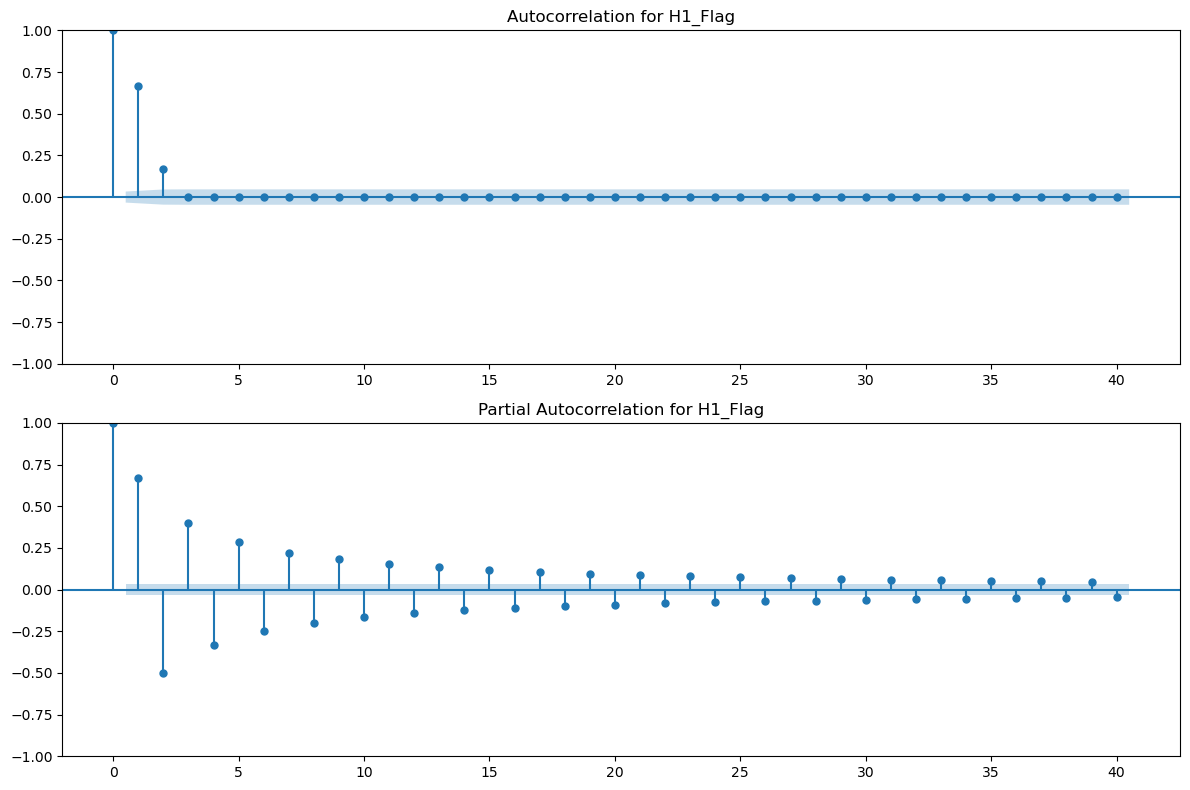

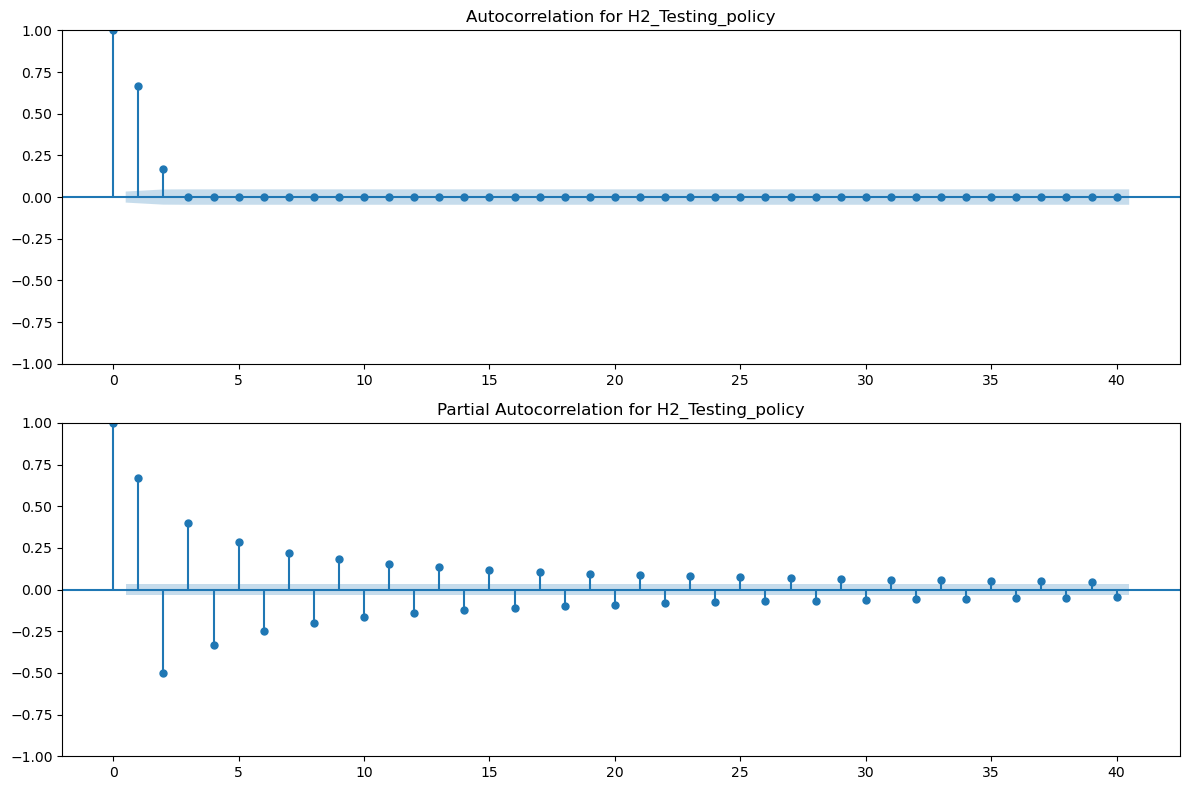

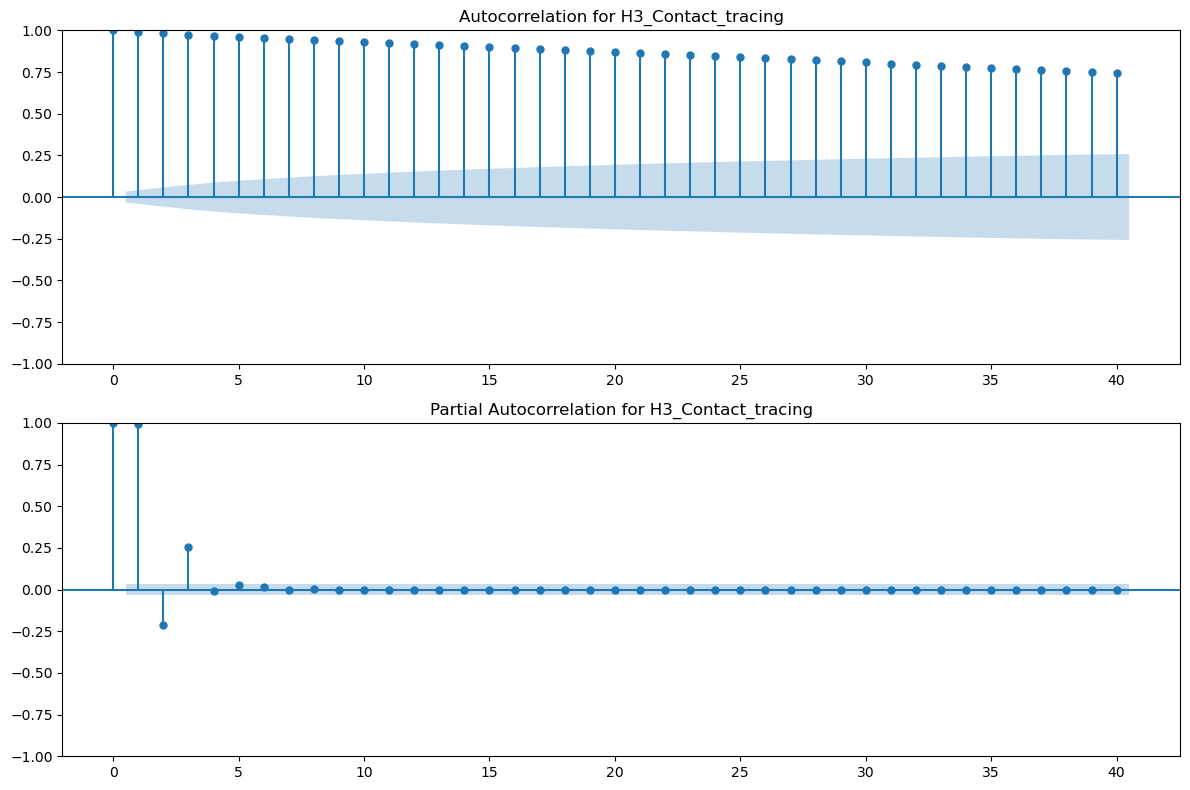

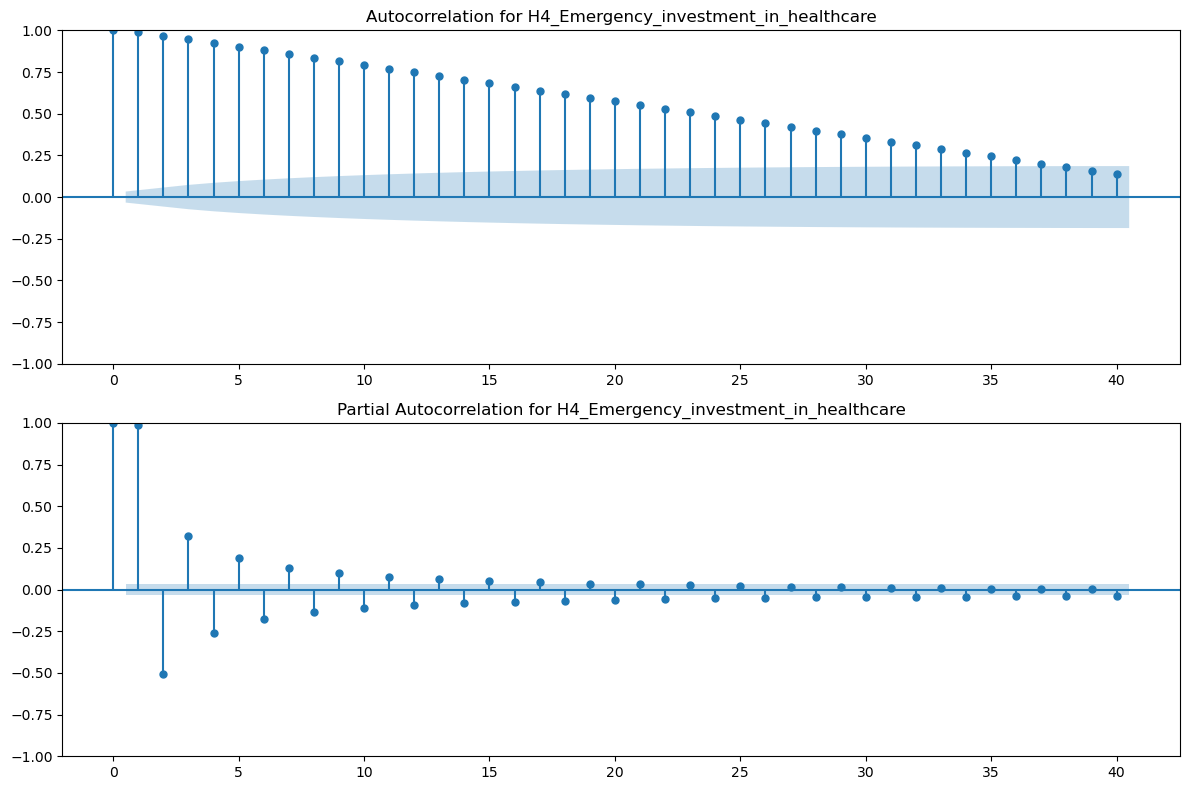

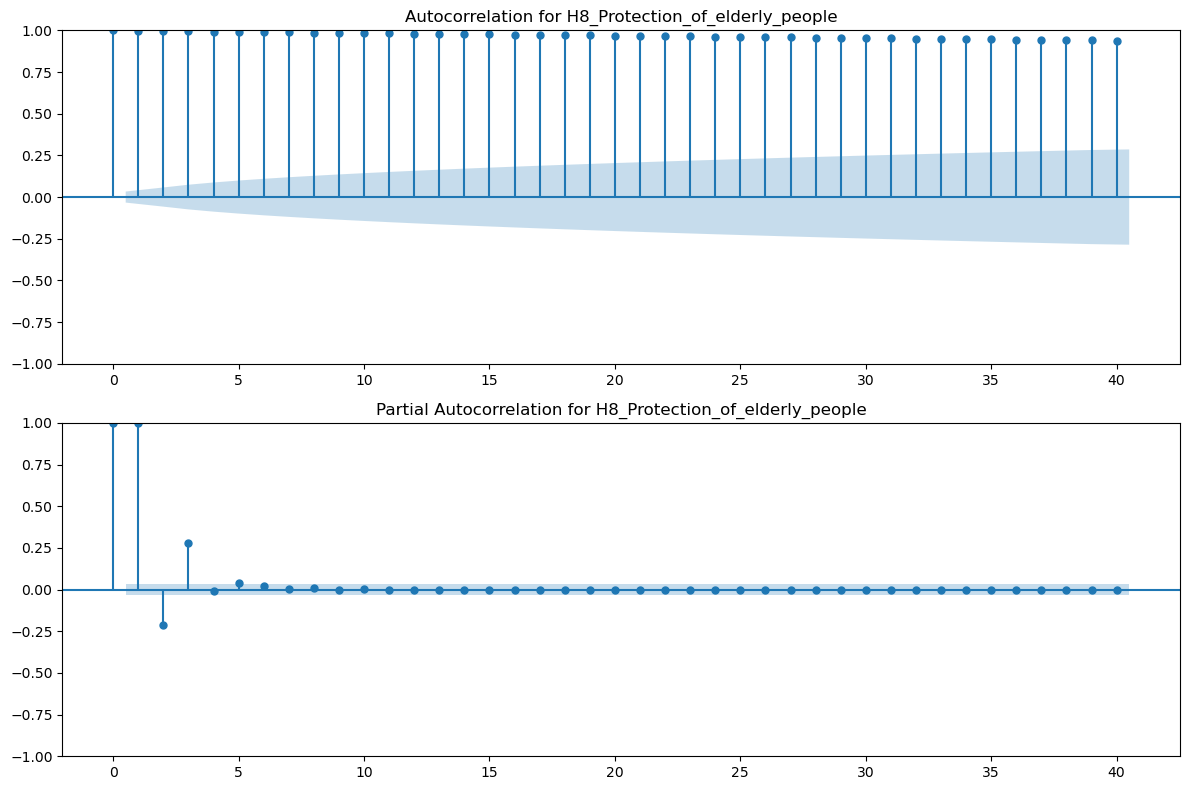

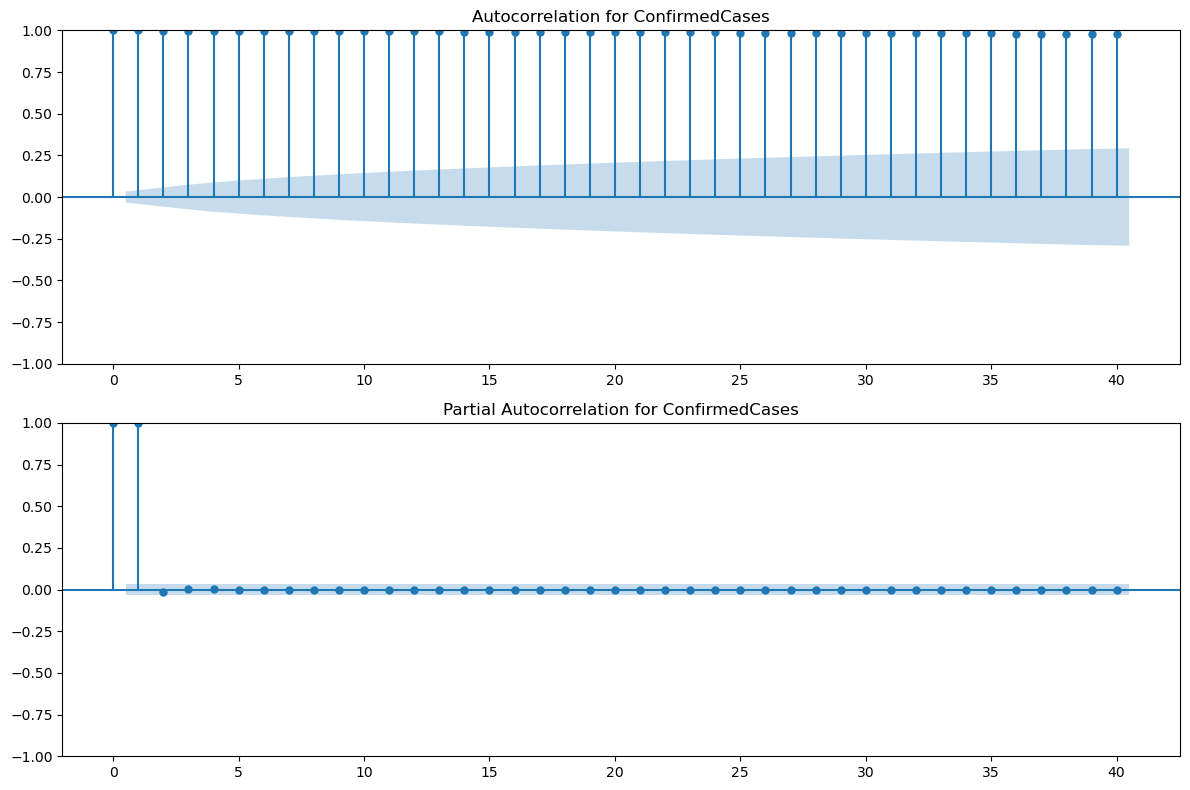

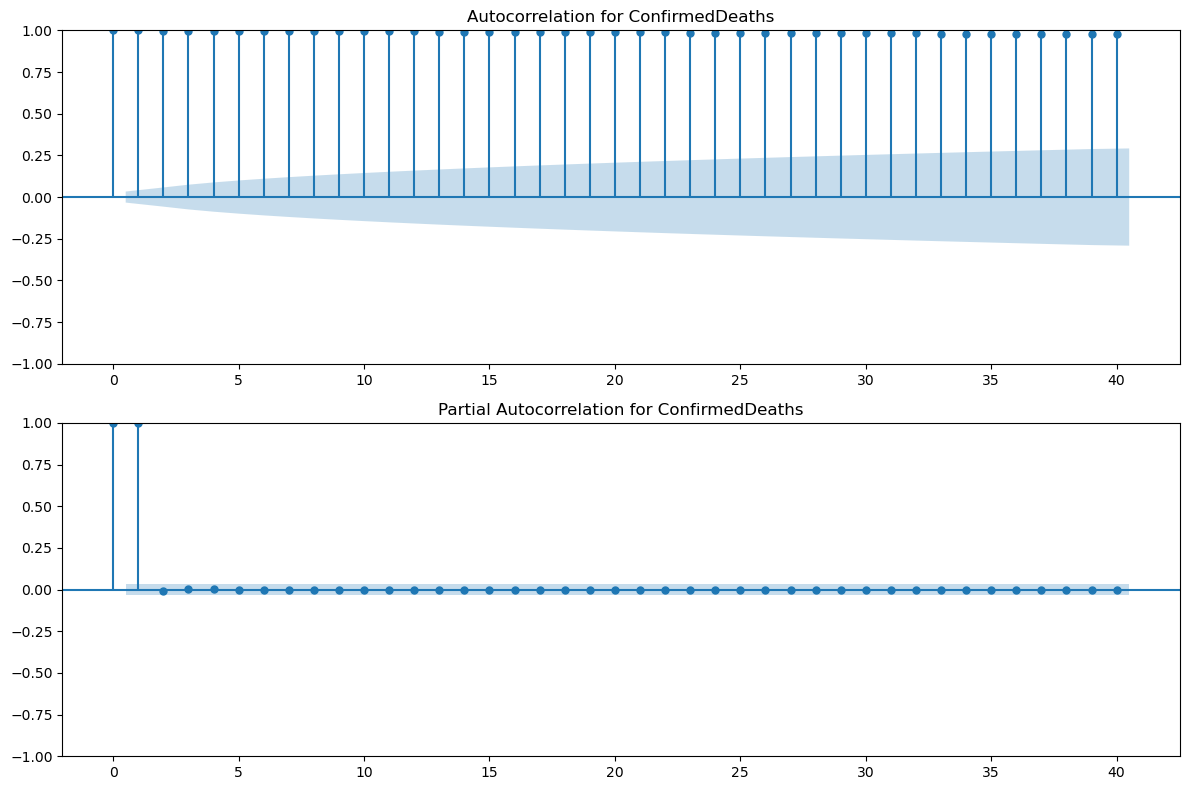

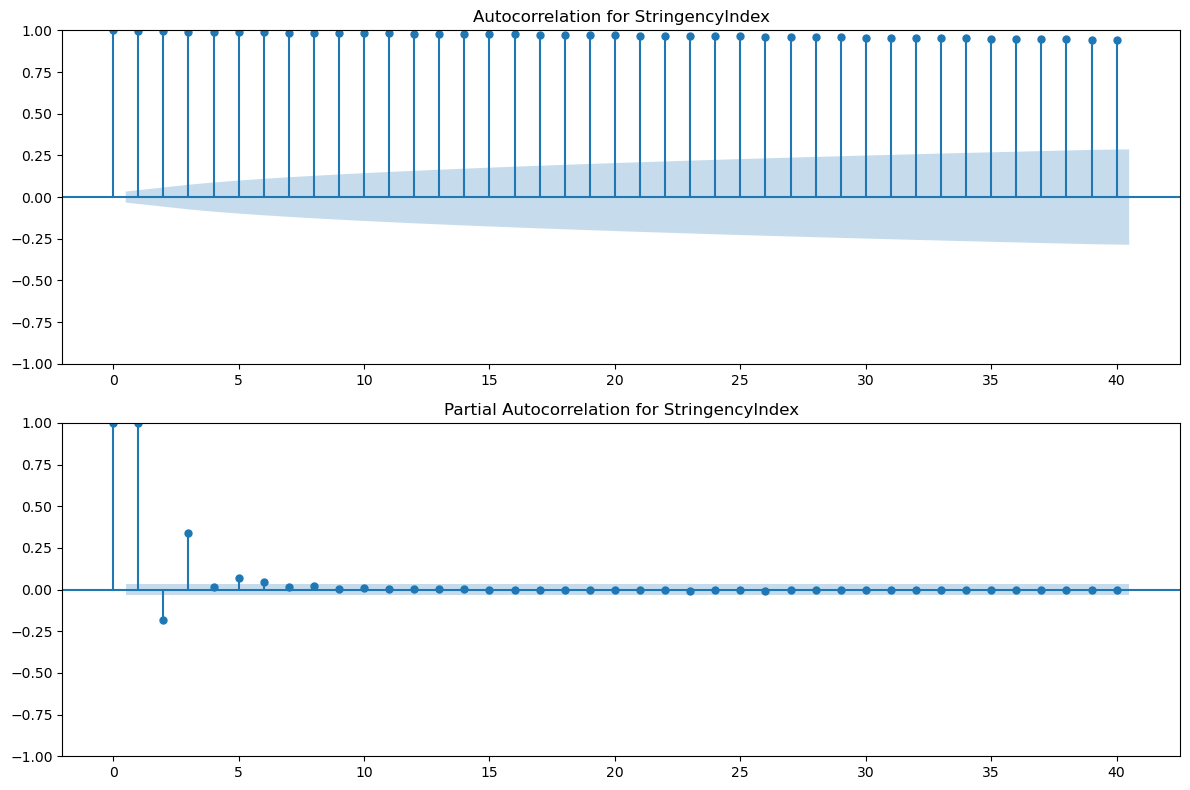

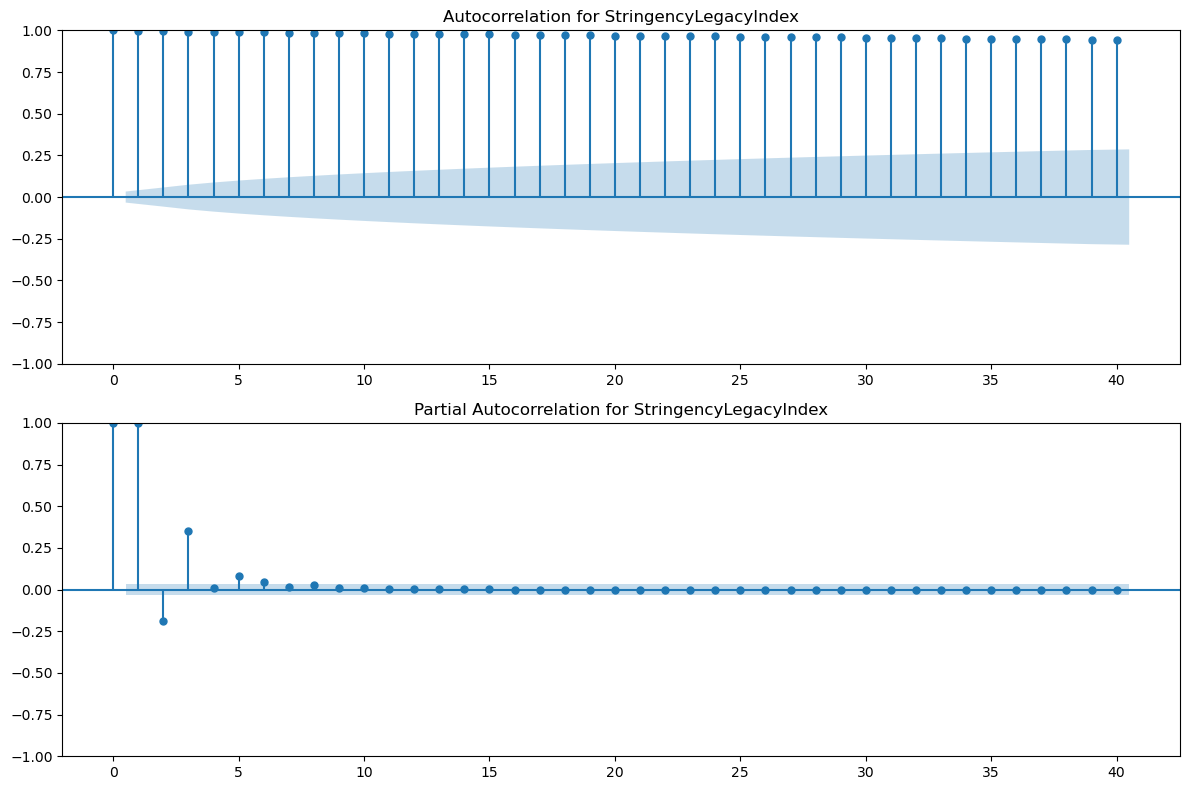

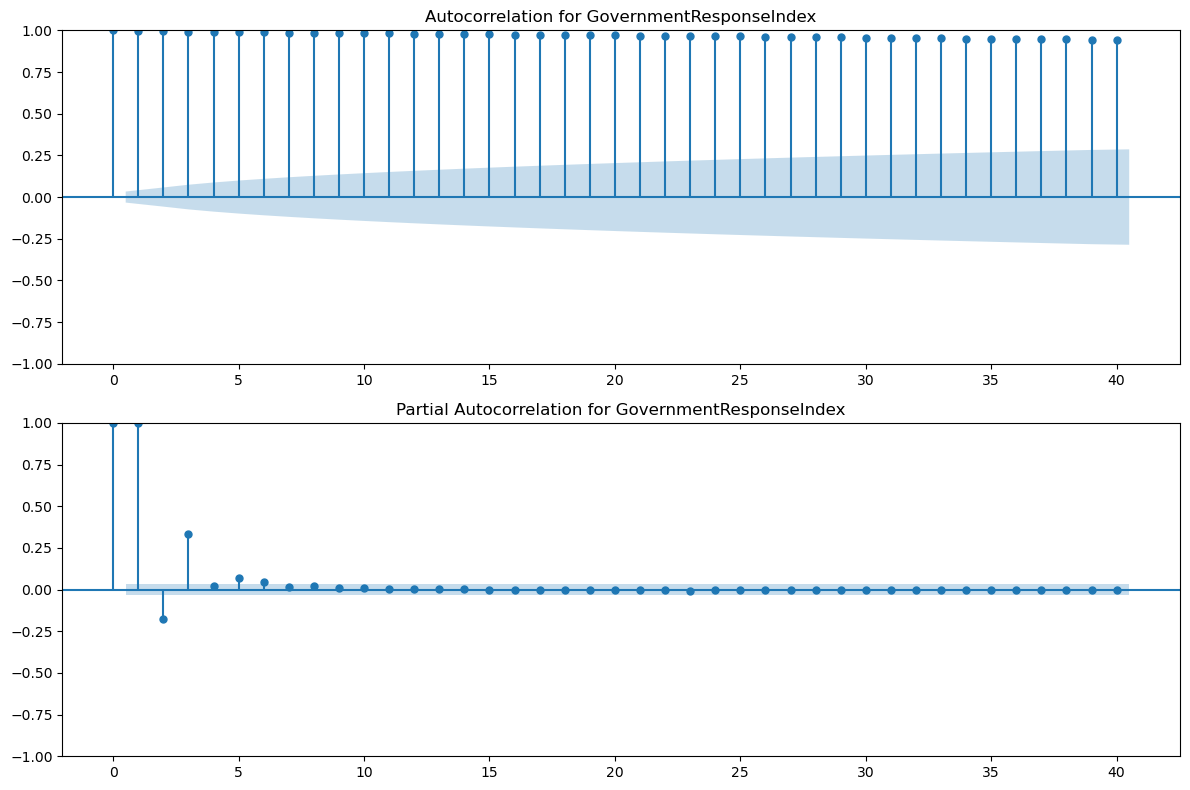

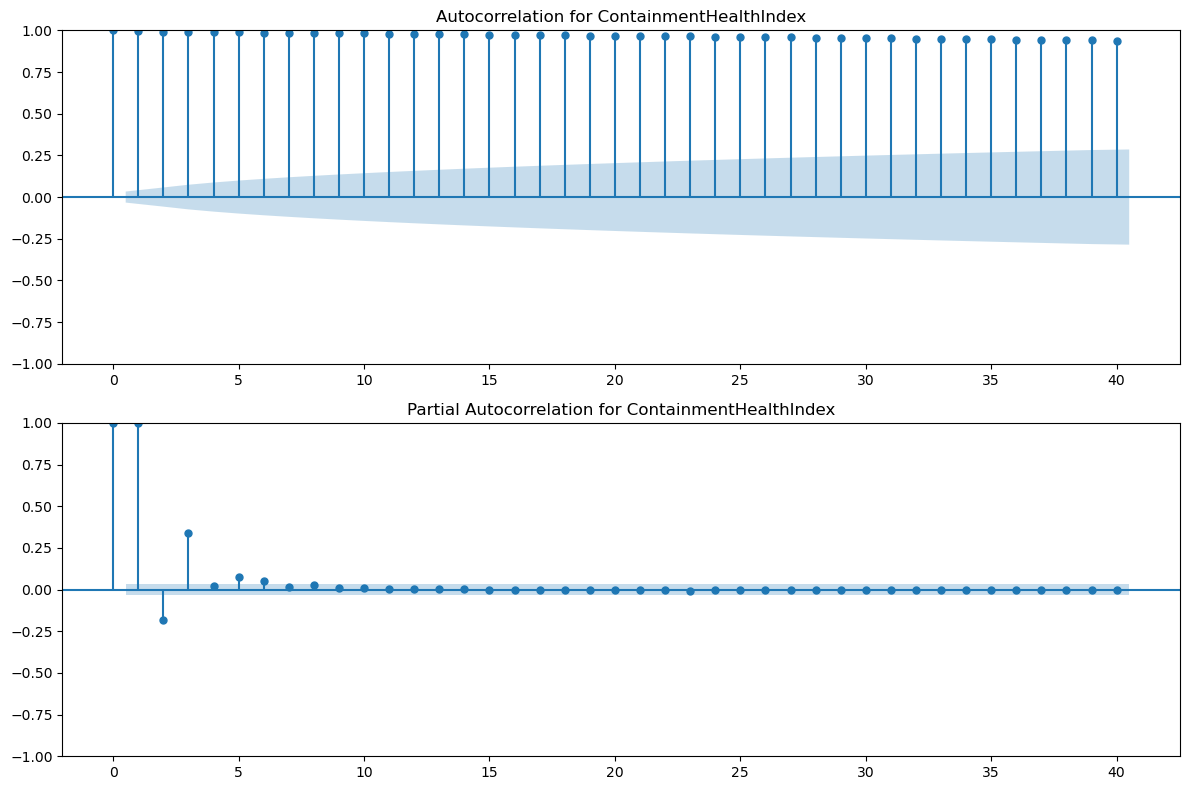

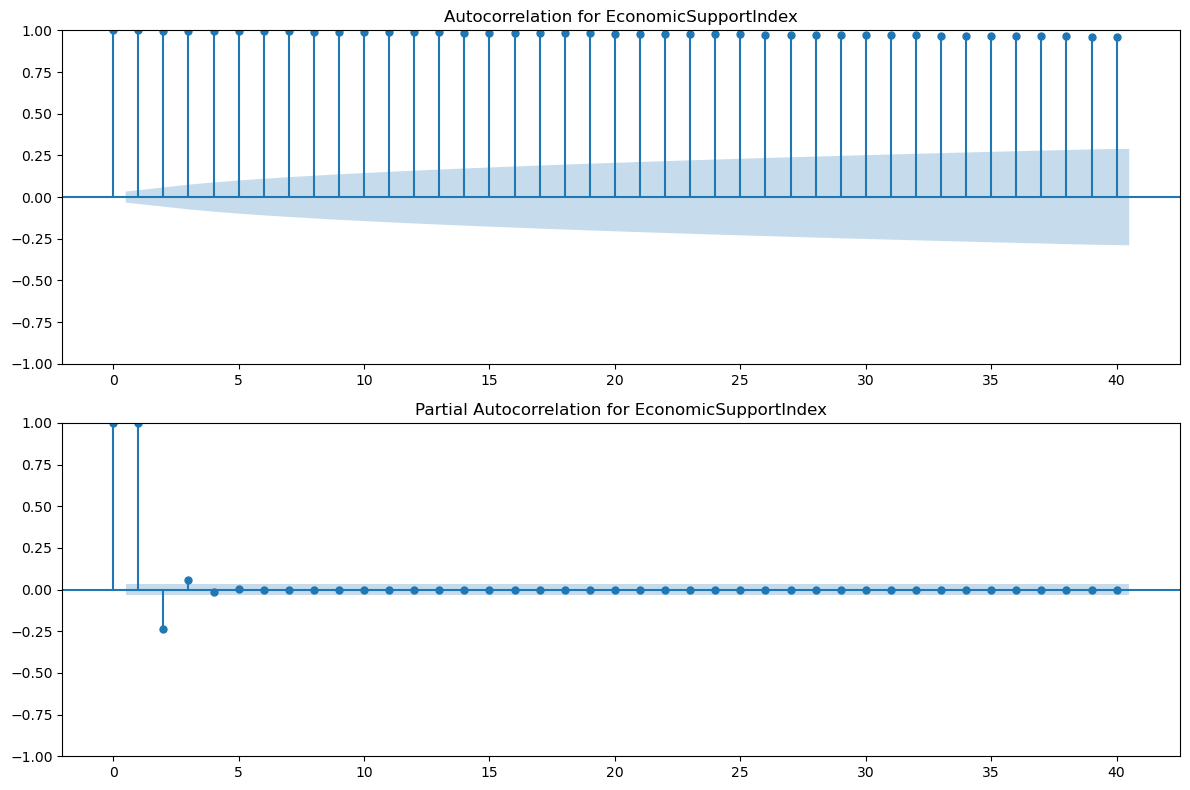

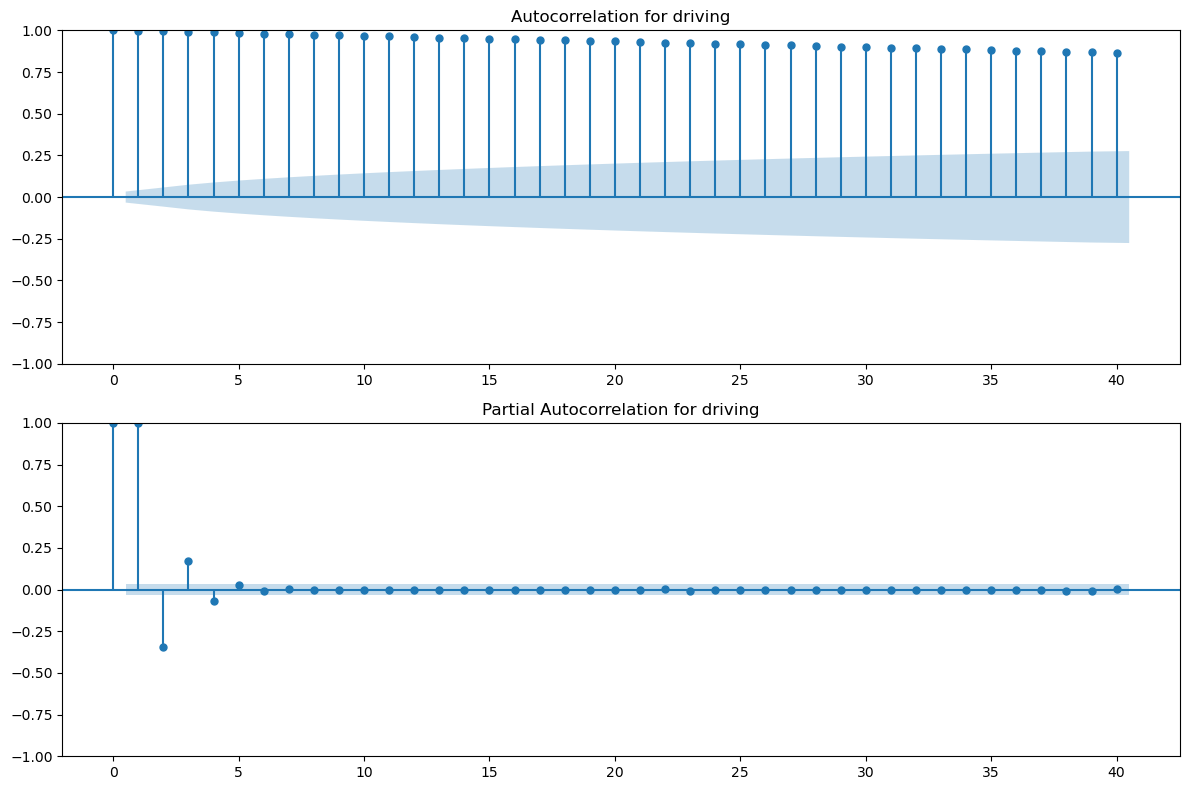

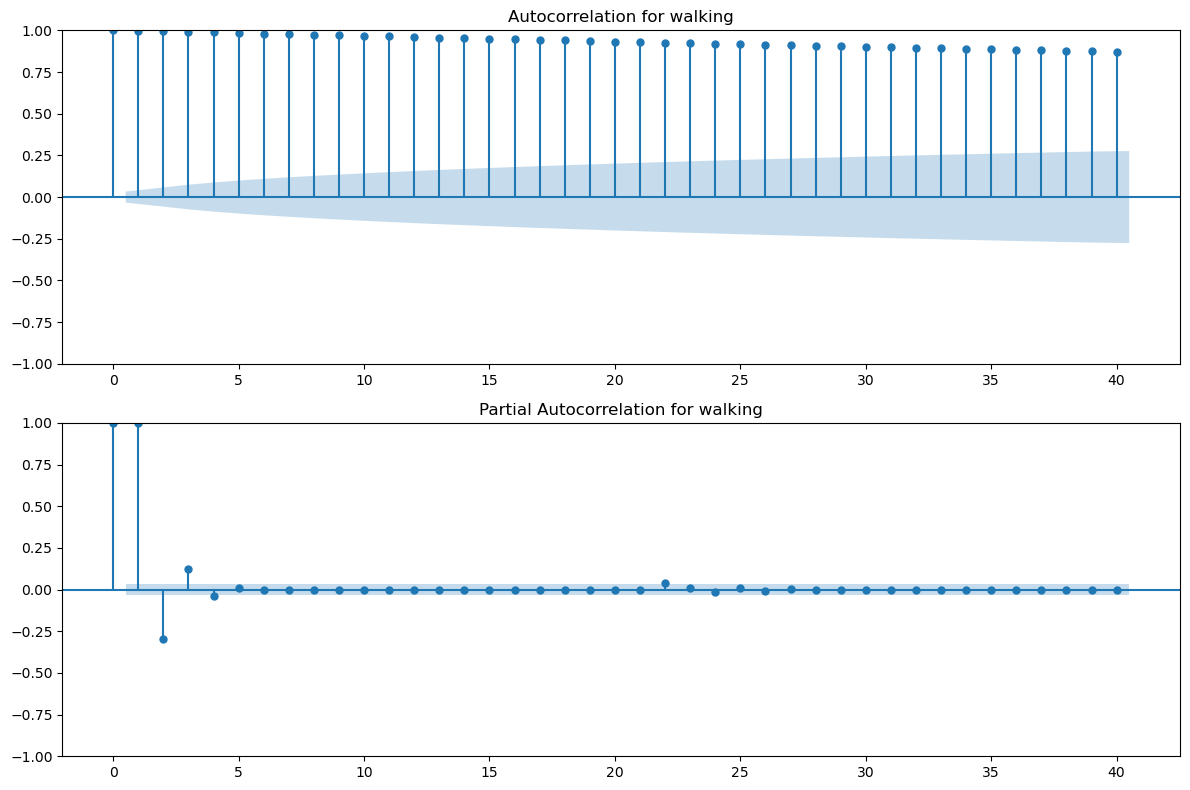

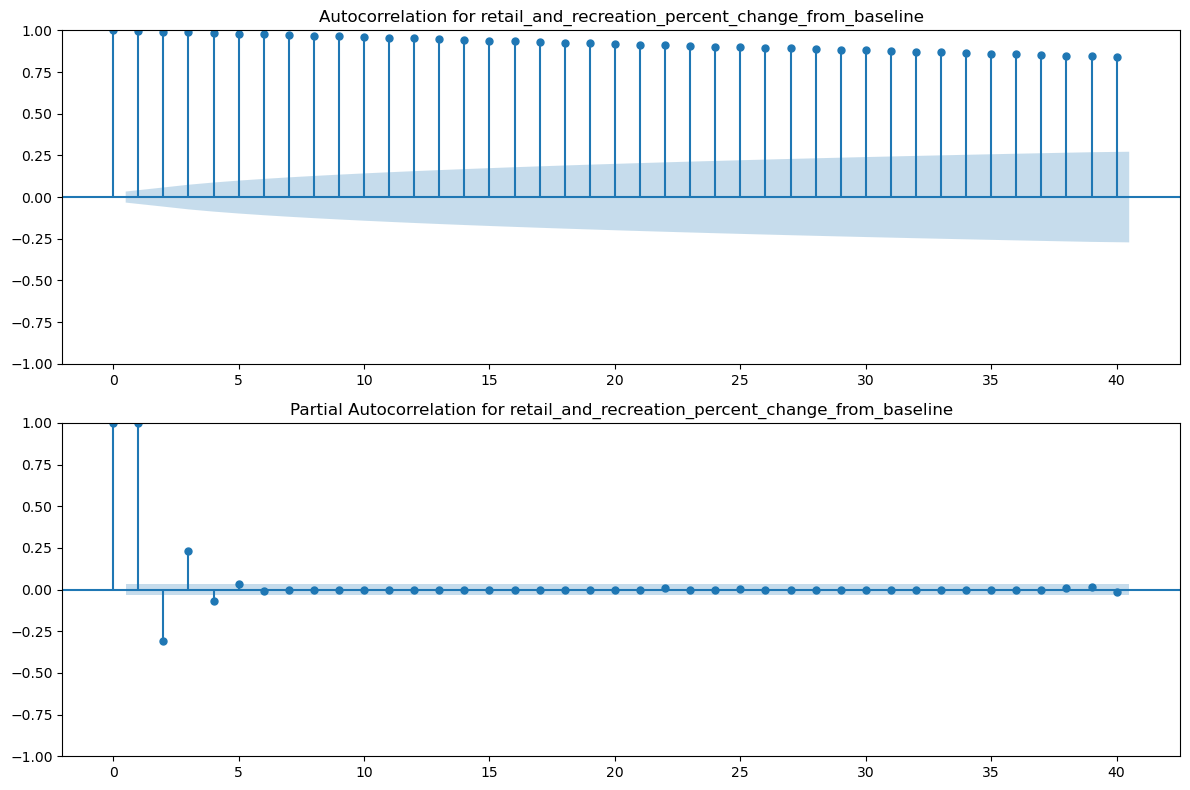

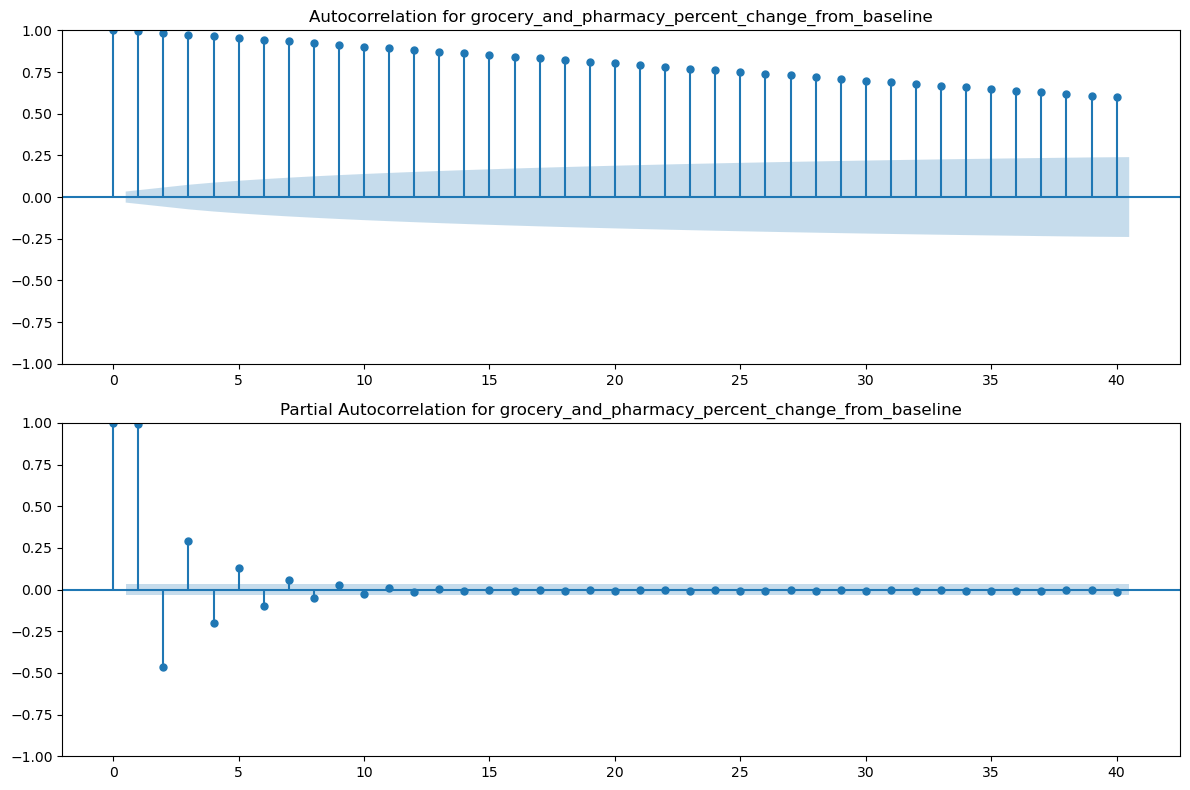

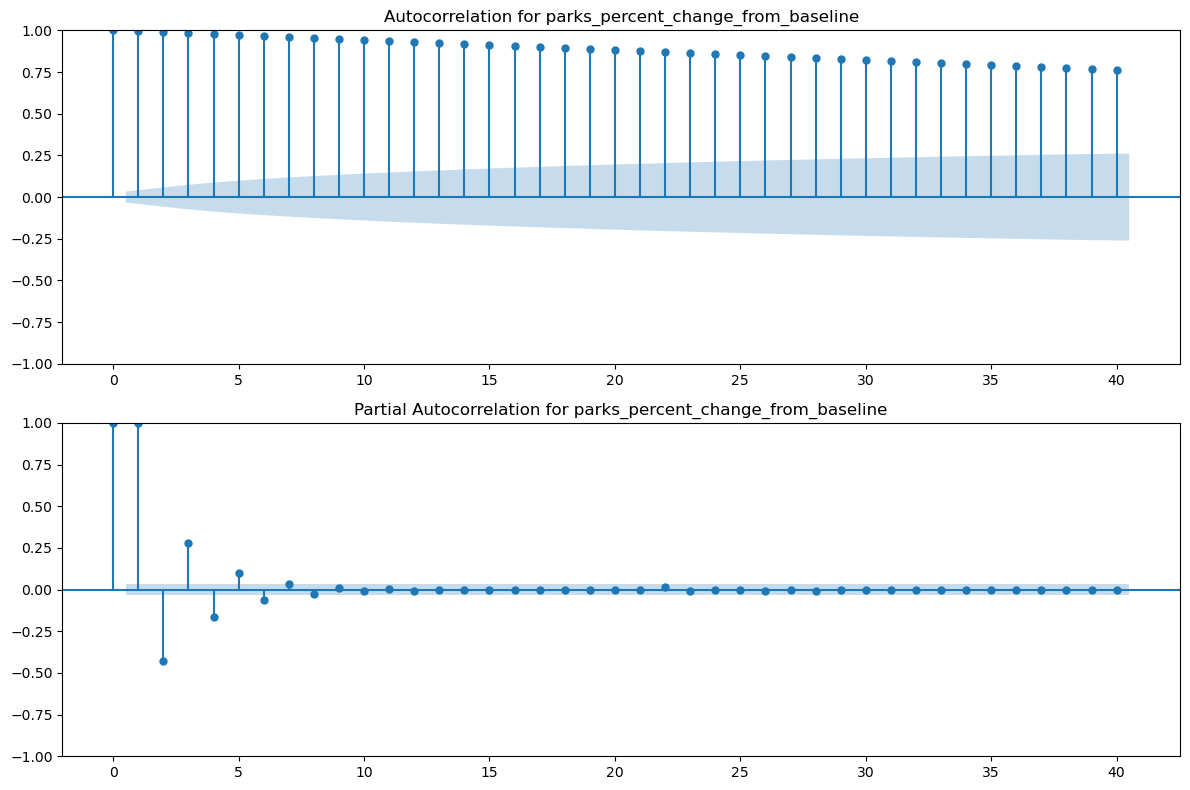

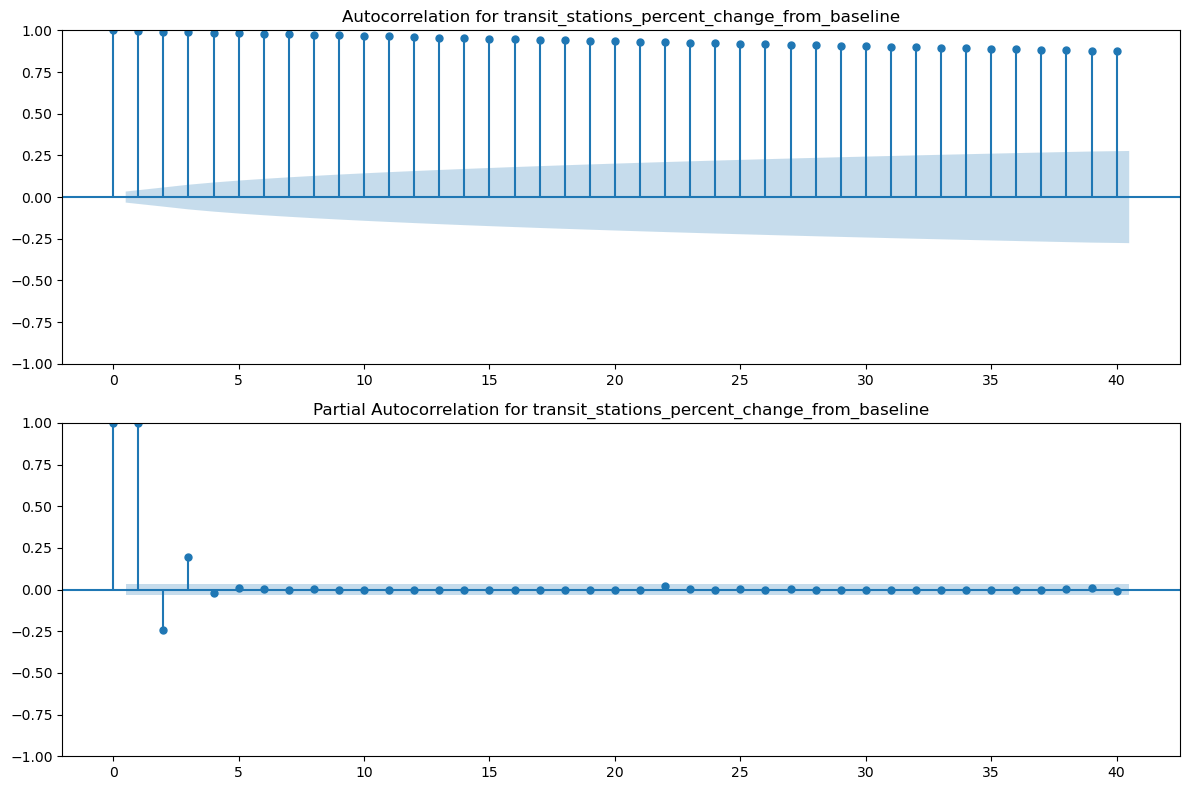

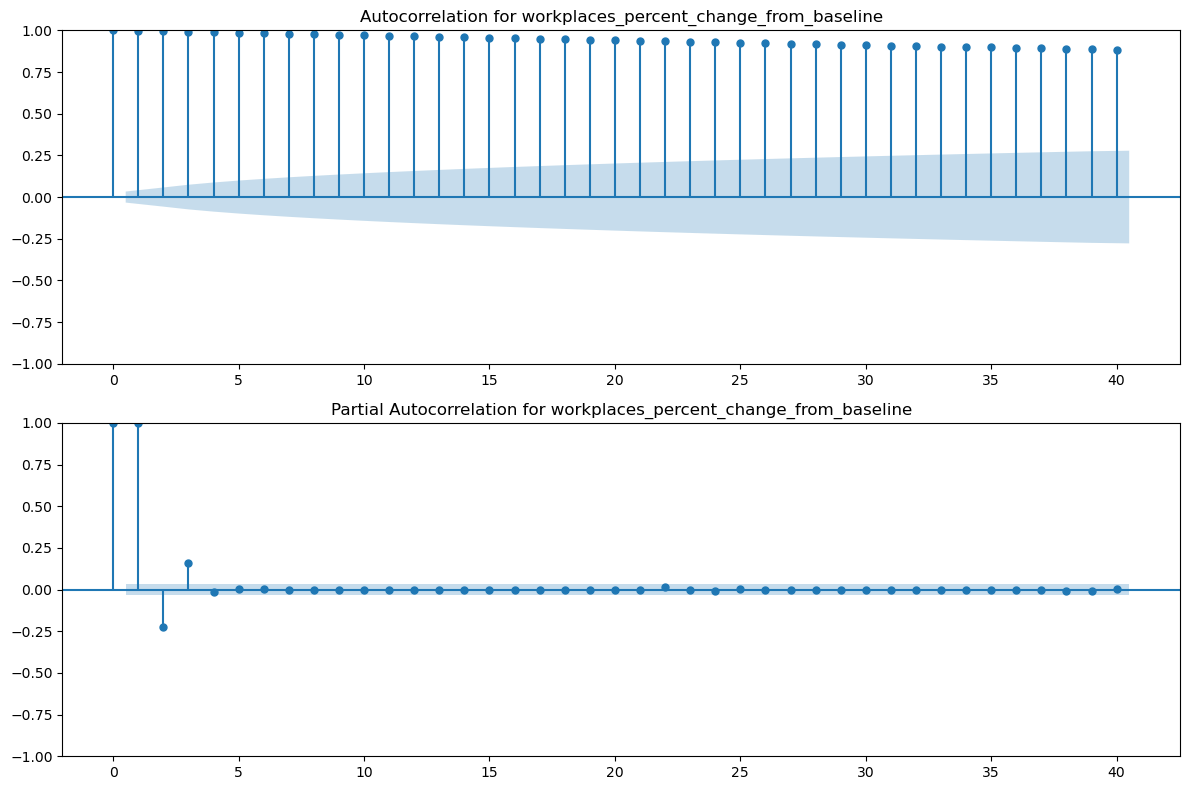

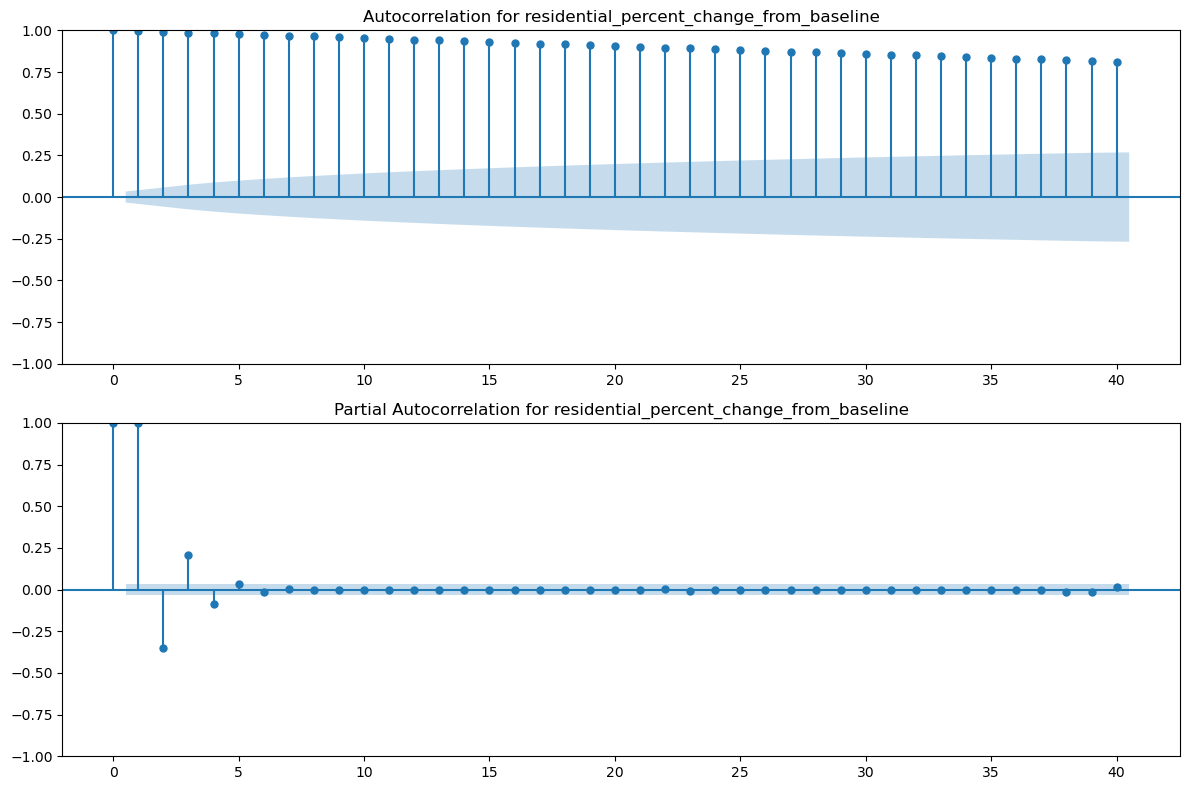

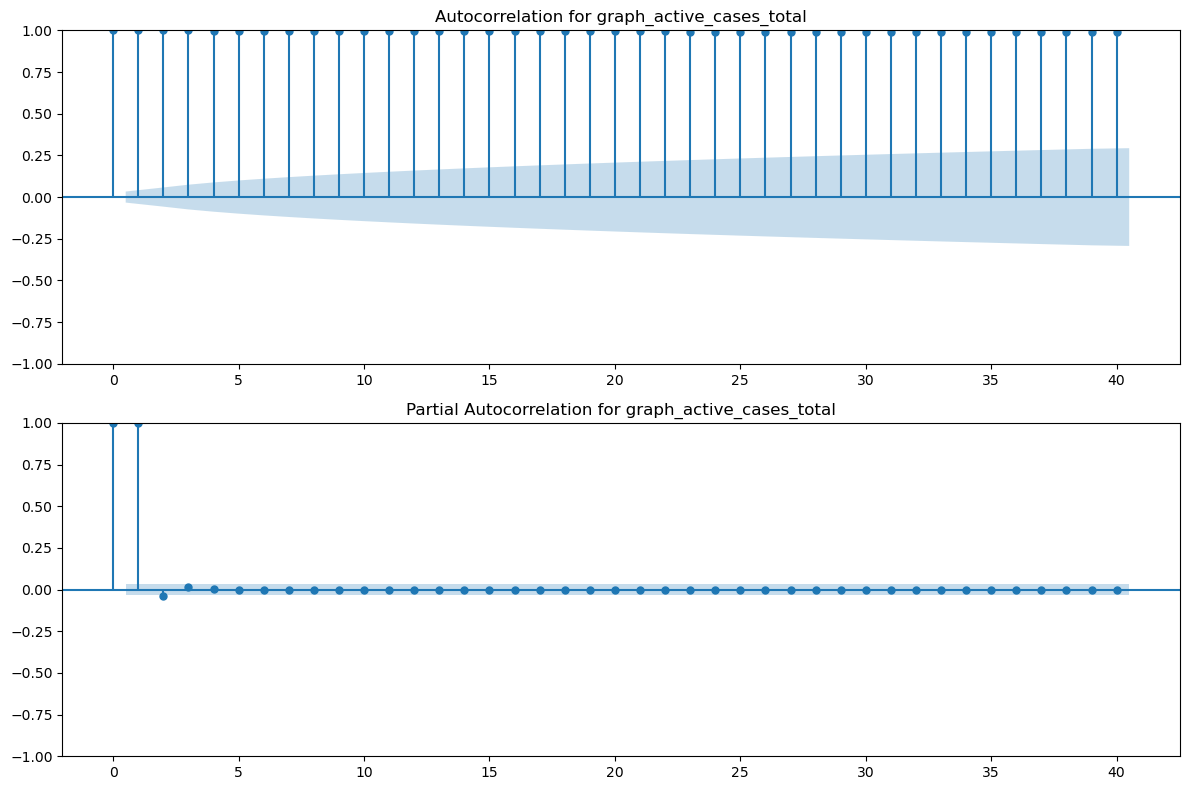

In [30]:
import statsmodels.api as sm
import matplotlib.pyplot as plt


for f in lag_features:
    fig, ax = plt.subplots(2, 1, figsize=(12, 8))


    sm.graphics.tsa.plot_acf(data[f].dropna(), lags=40, ax=ax[0])
    ax[0].set_title(f"Autocorrelation for {f}")


    sm.graphics.tsa.plot_pacf(data[f].dropna(), lags=40, ax=ax[1], method="ywm")
    ax[1].set_title(f"Partial Autocorrelation for {f}")

    plt.tight_layout()
    plt.show()

In [33]:
from statsmodels.tsa.stattools import acf, pacf

max_lags = 40
significant_lags = {}

for feature in lag_features:
    acf_vals, acf_conf_int = acf(
        data[feature].dropna(), nlags=max_lags, alpha=0.05, fft=True
    )
    pacf_vals, pacf_conf_int = pacf(
        data[feature].dropna(), nlags=max_lags, alpha=0.05, method="ywm"
    )


    significant_acf_lags = [
        lag for lag in range(len(acf_vals)) if abs(acf_vals[lag]) > acf_conf_int[lag][1]
    ]
    significant_pacf_lags = [
        lag
        for lag in range(len(pacf_vals))
        if abs(pacf_vals[lag]) > pacf_conf_int[lag][1]
    ]


    all_significant_lags = list(set(significant_acf_lags + significant_pacf_lags))


    significant_lags[feature] = all_significant_lags

In [35]:
for feature, lags in significant_lags.items():

    significant_lags[feature] = sorted(lags)[:3]

In [36]:
significant_lags

{'prss': [2, 3, 4],
 'mslp': [2, 3, 4],
 'tpp6': [2, 8, 14],
 'shif': [2, 3, 4],
 'dswf': [2, 3, 4],
 'rh2m': [2, 3, 4],
 't02m': [2, 3, 4],
 'tcld': [2, 3, 8],
 'cape': [2, 4, 8],
 'cinh': [2, 8, 14],
 'lisd': [2, 3, 4],
 'lib4': [2, 3, 4],
 'pblh': [2, 3, 4],
 'tmps': [2, 3, 4],
 'solm': [2, 3, 4],
 'csno': [2, 8, 14],
 'crai': [2, 8, 14],
 'lcld': [2, 8, 14],
 'lhtf': [2, 3, 4],
 'mcld': [2, 8, 14],
 'hcld': [2, 3, 8],
 'wd': [5, 7, 8],
 'ws': [2, 7, 8],
 'mofd': [5, 22, 25],
 'mofi': [2, 3, 4],
 'NTdwp': [3, 4, 8],
 'NTvys': [3, 6, 9],
 'NTgust': [2],
 'NTskyl1': [6, 9, 12],
 'NTskyl2': [10, 16, 17],
 'NTskyl3': [3, 4, 26],
 'C1_School_closing': [2, 4],
 'C2_Workplace_closing': [2],
 'C3_Cancel_public_events': [2, 4],
 'C4_Restrictions_on_gatherings': [2],
 'C5_Close_public_transport': [2],
 'C6_Stay_at_home_requirements': [2],
 'C7_Restrictions_on_internal_movement': [2],
 'C8_International_travel_controls': [2],
 'E1_Income_support': [2],
 'E2_Debt_contract_relief': [2],
 'H1_Pub

In [4]:
int(round(0.2 * 50 / 100, 0))

0

In [6]:
max(2, int(round(0.2 * 50 / 100, 0)))

2